# Klassifikation

Bei der Klassifikation werden Kategorien zu Objekten zugewiesen. Betrachten wir das Beispiel in {numref}`fig-class-example`. Das obere Bild zeigt einen Wal vor einem Eisberg. Das untere Bild zeigt einen Bär in einem Wald. Beides erkennt man als menschlicher Betrachter instinktiv, ohne darüber nachzudenken. Das Ziel der Klassifikation ist es, diese Kategorisierung von Objekten automatisch durch einen Algorithmus durchführen zu lassen. Eine wichtige Einschränkung im Vergleich zu unserer menschlichen Kategorisierung ist, dass wir nur mit bestimmten und im Vorfeld festgelegten Kategorien arbeiten können. Im Beispiel in {numref}`fig-class-example` könnten diese Kategorien zum Beispiel "Wal", "Bär" und "Sonstiges" sein. Die Klassifikationsaufgabe wäre dann die Zuweisung einer dieser drei Kategorien zu den Bildern. Die Kategorien, in die die Objekte eingeteilt werden, nennt man auch *Klassen*3.

```{figure} images/classification_example_german.png
---
width: 600px
name: fig-class-example
---
Zuweisung der Kategorien Wal und Bär zu Bildern
```

Etwas abstrakter können wir uns die Klassifikation wie in Abbildung {numref}`fig-class-abstract` vorstellen. Wir haben also Objekte, für die wir ein *Konzept* kennen. Wenden wir unser Konzept auf die Objekte an, erhalten wir die Einteilung in Klassen. Wir kennen also ein Konzept, das Wale beschreibt und das wir auf das Bild anwenden können, um die Klasse zu bestimmen.

```{figure} images/classification_concept_german.png
---
width: 600px
name: fig-class-abstract
---
Abstraktes Konzept der Klassifikation
```

Mit Klassifikationsalgorithmen können wir eine *Hypothese* aus den Daten ableiten, mit der die Klasse von Objekten anhand der Merkmale bestimmt werden kann. Als Beispiel betrachten wir das Bild des Wals mittels der Merkmale ({numref}`fig-hypothesis`). Über diese Merkmale könnte man auf folgende Hypothese kommen: *Objekte mit Flossen, die eine ovale Form haben, die oben schwarz und unten weiß sind und die sich vor einem blauen Hintergrund befinden, sind Wale.* Diese Hypothese mag zwar nicht in jedem Fall richtig sein, sie ist aber eine relativ gute Beschreibung, mit der man viele Wale (bzw. Orcas) richtig erkennt. Fehler würde man zum Beispiel machen, wenn es ein U-Boot mit einer ähnlichen Farbwahl gäbe. Die Art der Hypothese, zum Beispiel ob es sich um einen logischen Ausdruck oder eine beliebige mathematische Funktion handelt, hängt von der Wahl des Algorithmus ab. Die Hypothese selbst wird vom Lernalgorithmus automatisch aus den Daten bestimmt.

```{figure} images/hypothesis_german.png
---
width: 600px
name: fig-hypothesis
---
Beispiel für Merkmale, die für eine Hypothese über das Objekt verwendet werden können.
```

Formal haben wir eine Menge von Objekten $O = \{object_1, object_2, ...\}$, die möglicherweise unendliche viele Elemente enthält. Außerdem haben wir eine Repräsentation der Objekte als Instanzen im Merkmalsraum $\mathcal{F} = \{\phi(o): o \in O\}$ und eine endliche Anzahl von Klassen $C = \{class_1, ..., class_n\}$. Die Klassifikation wird durch ein *Zielkonzept* (engl. *target concept*) beschrieben, das die Objekte auf ihre Klassen abbildet, also

$$h^*: O \to C.$$
 
Das Zielkonzept ist die wahre Klasse der Objekte, also eine perfekte Zuweisung von Objekten zu Klassen. Im Normalfall ist keine mathematische Beschreibung des Zielkonzepts bekannt. Es gibt zum Beispiel keine mathematische Beschreibung zur Klassifikation von Bildern in Walbilder und Bärenbilder. Die *Hypothese* bildet die Merkmale auf die Klassen ab, also

$$h: \mathcal{F} \to C.$$

Die Hypothese wird vom Klassifikationsalgorithmus so bestimmt, dass sie eine gute Approximation des Zielkonzepts ist, also

$$h^*(o) \approx h(\phi(o)).$$

Eine Variante der Klassifikation ist die Berechnung von *Scores* für jede Klasse $c \in C$. In diesem Fall haben wir für jede Klasse Scoring-Funktionen:

$$h_c': \mathcal{F} \to \mathbb{R}$$

Die Scores sind ähnlich zum Soft Clustering: Anstatt alle Instanzen genau einer Klasse zuzuweisen, bestimmen wir einen Wert für jede Klasse, den wir dann für die Entscheidungsfindung nutzen können. Im Normalfall wird dann die Klasse zugewiesen, die den höchsten Score hat. Wir haben also

$$h(x) = \arg\max_{c \in C} h_c'(x)$$ 

für $x \in \mathcal{F}$. Oft handelt es sich bei den Scores um Wahrscheinlichkeitsverteilungen, sodass der Score für jede Klasse im Intervall $[0,1]$ liegt und die Summe der Scores aller Klassen eins ergibt. In diesem Fall geben die Scores die Wahrscheinlichkeit an, dass ein Objekt zu einer bestimmten Klasse gehört. 

## Binäre Klassifikation und Grenzwerte

Ein häufig betrachteter Spezialfall der Klassifikation ist die binäre Klassifikation, bei der es genau zwei Klassen gibt. Auch wenn es sich hierbei um eine starke Einschränkung handelt, gibt es viele Probleme, die man mithilfe von binärer Klassifikation lösen kann. Beispiele hierfür sind die Vorhersage, ob ein Schuldner einen Kredit abbezahlen kann, ob es sich bei einer Transaktion um Kreditkartenbetrug handelt oder ob eine E-Mail Spam ist.

Bei der binären Klassifikation nennt man eine Klasse *positiv* und die andere *negativ*. Da es nur die zwei Klassen $C = \{positiv, negativ\}$ gibt, kann man das Berechnen der Scores unter der Annahme, dass es sich bei den Scores um Wahrscheinlichkeiten handelt, vereinfachen. Es gilt dann nämlich

$$h_{negativ}'(x) = 1-h_{positiv}'(x),$$

da die Summe der Wahrscheinlichkeiten eins ergibt. Entsprechend reicht es auch, nur die Scoring-Funktion für die positive Klasse zu berechnen, und wir nutzen die Notation $h'(x) = h_{positiv}'$ für die binäre Klassifikation. Statt einfach die Klasse mit der höchsten Wahrscheinlichkeit auszuwählen können wir jetzt auch einen *Grenzwert* $t \in [0,1]$ festlegen, der für die positive Klasse erreicht sein muss. Wenn $h'(x) \geq t$, ist $x$ positiv, wenn der Score kleiner als der Grenzwert ist, ist $x$ negativ. Es gilt also:

$$h_t(x) = \begin{cases}\textit{positiv} & \text{wenn}~h'(x) \geq t \\ \textit{negativ} & \text{wenn}~h' < t\end{cases}$$

Warum Grenzwerte und Scoring-Funktionen relevant für die Klassifikation sind, kann man sich gut an einem Beispiel verdeutlichen. Das Histogramm unten zeigt fiktive Daten von Scores einer Spamerkennungsklassifikation, bei der positive Instanzen kein Spam sind.

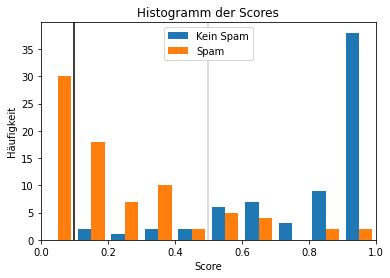

In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# generate sample data
X, y = make_blobs(n_samples=300, centers=2, center_box=(0, 1),
                  cluster_std=0.3, random_state=1)

# split the data into 50% training data and 50% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# predict scores with a random forest
classifier = RandomForestClassifier(random_state=0)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

fig, ax = plt.subplots()
ax.hist([y_score[y_test==1,1], y_score[y_test==0,1]], bins=10, label=['Kein Spam', 'Spam'])
ax.set_xlim(0,1)
ax.set_title('Histogramm der Scores')
ax.set_xlabel('Score')
ax.set_ylabel('Häufigkeit')
ax.axvline(0.5, color='lightgray')
ax.axvline(0.1, color='black')
plt.legend(loc="upper center")
plt.show()

Die orangen Balken zeigen die Scores von Spam-E-Mails, die blauen Balken die Scores aller regulären E-Mails. Wenn man keinen Grenzwert auswählt, würde man einfach die Klasse mit dem höchsten Score vorhersagen. Dies ist äquivalent zu einem Grenzwert von 0,5, dargestellt durch die graue vertikale Linie. In diesem Beispiel würden wir also die meisten E-Mails richtig vorhersagen, aber auch einige E-Mails als Spam markieren, obwohl sie eigentlich kein Spam sind, und auch einige E-Mails nicht als Spam erkennen, obwohl es sich um Spam handelt. Wir haben es hier mit unterschiedlichen Arten von Fehlern zu tun, die für diesen Anwendungsfall nicht gleichwertig sind. Auch wenn Spam nervig ist, ist das Löschen einer E-Mail nicht sehr aufwendig, es sei denn, man hat es mit Hunderten oder gar Tausenden von Spam-E-Mails zu tun. Wenn jedoch auch nur eine einzige wichtige E-Mail versehentlich als Spam markiert wird und der Empfänger diese E-Mail dadurch nicht angezeigt bekommt, kann dies große negative Konsequenzen haben. Dieses Problem können wir durch die Auswahl eines geeigneten Grenz-werts lösen. Die schwarze Linie markiert einen Grenzwert von 0,1. Mit diesem Grenzwert würde man nur Spam-E-Mails als solche kennzeichnen. In der Folge würde man zwar auch mehr Spam-E-Mails nicht erkennen, aber es würden keine regulären E-Mails durch den Spamfilter abgefangen. Dies zeigt, dass die Wahl eines geeigneten Grenzwerts den Unterschied zwischen einer guten Lösung für einen Anwendungsfall und einem ungeeigneten Modell machen kann.

## Gütemaße

Eine Kernfrage der Klassifikation ist, wie gut die Hypothese $h$ das Zielkonzept $h^*$ approximiert. In der Regel erreicht man keine perfekte Lösung, es gibt also Instanzen, die falsch durch die Hypothese klassifiziert werden. Das obige Spamerkennungsbeispiel zeigt bereits, dass es unterschiedliche Arten von Fehlern gibt, die wir berücksichtigen müssen. 

Die Grundlage für die Bewertung der Güte von Klassifikationsalgorithmen sind Testdaten. Hierzu wird die Hypothese auf die Merkmale der Testdaten angewandt. Anschließend kann man die Vorhersageergebnisse mit der wahren Klasse vergleichen. Die {numref}`tbl-data-cls` zeigt dies am Beispiel der Wal- und Bärenbilder. Die erste Instanz wird korrekt vorhersagt, bei der zweiten Instanz macht unsere fiktive Hypothese einen Fehler. Wenn es Tausende oder sogar Millionen von Instanzen in den Testdaten gibt, ist es nicht machbar, die Ergebnisse anhand einer solchen Tabelle auszuwerten. Stattdessen brauchen wir eine kompaktere Darstellung der Güte der Ergebnisse, um die Vorhersagen mit den wahren Klassen zu vergleichen.

```{table} Beispiel für Daten und Vorhersagen
:name: tbl-data-cls

| Form     | Farbe oben | Farbe unten | Hintergrundfarbe | Flossen | Klasse | Vorhersage |
|----------|------------|-------------|------------------|---------|--------|------------|
| Oval     | Schwarz    | Weiß        | Blau             | Ja      | Wal    | Wal        |
| Rechteck | Braun      | Braun       | Grün             | Nein    | Bär    | Wal        |
| ...      | ...        | ...         | ...              | ...     | ...    | ...        |
```

### Die Confusion Matrix

Das wichtigste Werkzeug für die Analyse der Qualität von Hypothesen ist die *Confusion Matrix*, eine tabellenartige Beschreibung der Häufigkeiten, mit denen die Hypothese richtig liegt bzw. Fehler macht, also verwirrt (engl. *confused*) ist. Die Confusion Matrix für unser Bildklassifikationsbeispiel könnte wie in {numref}`tbl-confusion-matrix` aussehen.

```{table} Beispiel einer Confusion Matrix. Die Spalten stehen für die wahre Klasse und die Zeilen für die Vorhersagen.
:name: tbl-confusion-matrix

|               | Wal | Bär | Sonstiges |
|---------------|-----|-----|-----------|
| **Wal**       | 29  | 1   | 3         |
| **Bär**       | 2   | 22  | 13        |
| **Sonstiges** | 4   | 11  | 51        |
```

Im Wesentlichen zählt die Confusion Matrix, wie oft Instanzen einer bestimmten Klasse als welche Klasse vorhergesagt werden. Man sieht zum Beispiel, wie oft Wale als Wale vorhergesagt werden und wie oft sie stattdessen als Bären oder Sonstiges klassifiziert werden. Die Spalten zeigen die wahren Werte der Instanzen, also das Zielkonzept. Die Zeilen zeigen die Vorhersagen, also die Hypothese. In unserem Beispiel haben wir 35 Bilder von Walen. Dies ist die Summe der Werte in der ersten Spalte. 29 dieser Walbilder werden richtig klassifiziert, zwei werden fehlerhaft als Bären erkannt und vier werden fehlerhaft als Sonstiges eingeordnet. Wir bekommen mithilfe der Confusion Matrix also detaillierte statistische Informationen darüber, wie die Instanzen einer Klasse klassifiziert werden. Die Werte auf der Diagonale sind die richtigen Vorhersagen, die anderen Werte sind die Fehler.

### Die binäre Confusion Matrix

Die binäre Confusion Matrix ist der Spezialfall der Confusion Matrix für binäre Klassifikationsprobleme. Im Allgemeinen sieht die binäre Confusion Matrix wie in {numref}`tbl-binary-confusion-matrix` aus. 

```{table} Die binäre Confusion Matrix
:name: tbl-binary-confusion-matrix

|                     | Positive / True                      | Negative / False                     |
|---------------------|--------------------------------------|--------------------------------------|
| **Positive / True** | wahr positiv / true positive (TP) | falsch Positiv / false positive (FP) |
| **Negativ / False** | falsch negativ / false negative (FN) | wahr negativ / true negative (TN) |
```

Wir bekommen also abhängig von der wahren Klasse und der Vorhersage die Anzahl der *wahr-positiven* (engl. *true positive* / TP), *wahr-negativen* (engl. *true negative* / TN), *falsch-positiven* (engl. *false positive* / FP) und *falsch-negativen* (*false negatives* / FN) Ergebnisse. Die binäre Confusion Matrix ist auch jenseits des maschinellen Lernens verbreitet, zum Beispiel in der Medizin zur Bewertung der Qualität von Tests. Aus der Medizin stammen auch die Begriffe des *Fehlers 1. Art* (engl. *type I error*) und des *Fehlers 2. Art* (engl. *type II error*). Der Fehler 1. Art misst die Anzahl der falsch-positiven Ergebnisse. Das könnte zum Beispiel bedeuten, dass das Ergebnis eines Antigentests auf eine bestimmte Krankheit fälschlicherweise ein positives Ergebnis liefert, obwohl der Patient nicht erkrankt ist. Der Fehler 2. Art misst die Anzahl der falsch-negativen Ergebnisse. Dies würde zum Beispiel bedeuten, dass eine Krankheit von einem Antigentest übersehen wird, obwohl ein Patient erkrankt ist.

### Binäre Gütemaße

Mithilfe der binären Confusion Matrix können wir Gütemaße definieren, die die Güte einer Hypothese durch eine einzelne Zahl auf Basis eines statistischen Kriteriums zusammenfassen. Es gibt viele derartige Gütemaße, die alle unterschiedliche Aspekte der Güte messen. {numref}`tbl-metrics-class` listet elf derartige Gütemaße auf.

```{table} Gütemaße für die Klassifikation
:name: tbl-metrics-class

| Gütemaß | Beschreibung | Definition |
|--------|-------------|------------|
| True Positive Rate, Recall, Sensitivity | Prozentsatz der positiven Instanzen, die korrekt klassifiziert werden. | $TPR = \frac{TP}{TP+FN}$ |
| True Negative Rate, Specificity | Prozentsatz der negativen Instanzen, die korrekt klassifiziert werden. | $TNR = \frac{TN}{TN+FP}$ |
| False Negative Rate | Prozentsatz der positiven Instanzen, die fehlerhaft als negativ klassifiziert werden. | $FNR = \frac{FN}{FN+TP}$ |
| False Positive Rate | Prozentsatz der negativen Instanzen, die fehlerhaft als positiv klassifiziert werden. | $FPR = \frac{FP}{FP+TN}$ |
| Positive Predictive Value, Precision | Prozentsatz der positiven Vorhersagen, die korrekt sind. | $PPV = \frac{TP}{TP+FP}$ |
| Negative Predictive Value | Prozentsatz der negativen Vorhersagen, die korrekt sind. | $NPV = \frac{TN}{TN+FN}$ |
| False Discovery Rate | Prozentsatz der positiven Vorhersagen, die fehlerhaft sind und eigentlich negativ sein sollten. |$FDR = \frac{FP}{TP+FP}$ |
| False Omission Rate | Prozentsatz der negativen Vorhersagen, die fehlerhaft sind und eigentlich positiv sein sollten. | $FOR = \frac{FN}{FN+TN}$ |
| Accuracy | Prozentsatz der korrekten Vorhersagen  | $accuracy = \frac{TP+TN}{TP+TN+FP+FN}$ |
| F1-Score | Harmonisches Mittel von $recall$ und $precision$ | $F_1 = 2\cdot\frac{precision \cdot recall}{precision+recall}$ |
| Matthews correlation coefficient (MCC) | Korrelation zwischen den Vorhersagen und den wahren Klassen | $MCC = \frac{TP\cdot TN - FP\cdot FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$ |
```

Da es so viele Gütemaße gibt, stellt sich die Frage, welche man benutzen sollte. Die Auswertung von allen elf Gütemaßen gleichzeitig ist nicht sinnvoll. Viele Gütemaße sind stark miteinander korreliert und sie werden alle mit denselben vier Werten (TP, FP, TN, FN) berechnet. Stattdessen sollte man die Logik hinter der Definition der Gütemaße nachvollziehen, um zu verstehen, welche für einen bestimmten Anwendungsfall geeignet sind.

Die ersten vier Gütemaße berechnen den Anteil von richtigen bzw. falschen Vorhersagen in Relation zu den wahren Werten. Hiermit kann man Fragen der Form "wie viele positive/negative Instanzen sind korrekt klassifiziert" beantworten. Die Kombination aus TPR und TNR ist sehr wichtig, da diese Gütemaße zwei Fragen beantworten, die für viele Anwendungsfälle von elementarer Bedeutung sind: Wie viele positive und wie viele negative Instanzen werden korrekt gefunden? Entsprechend sind diese Gütemaße gut geeignet, um den Fehler 1. Art und den Fehler 2. Art zu schätzen. FPR und FNR sind die Gegenstücke zu TNR und TPR und lassen sich auch direkt aus diesen berechnen als $FPR=1-TNR$ bzw. $FNR=1-TPR$.


Die nächsten vier Gütemaße berechnen den Anteil von richtigen bzw. falschen Vorhersagen in Relation zu den Vorhersagen. Hiermit kann man Fragen der Form "wie viele positive/negative Vorhersagen sind richtig klassifiziert" beantworten. Der Unterschied zu den ersten vier Gütemaßen liegt in der Bezugsgröße, die hier nicht die wahren Klassen, sondern die Vorhersagen sind. Ansonsten sind die Gütemaße ähnlich zu den ersten vier Gütemaßen.

Eine gemeinsame Eigenschaft der ersten acht Gütemaße ist, dass sie niemals alleine benutzt werden. Der Grund liegt darin, dass diese Metriken jeweils nur eine Spalte bzw. Zeile der Confusion Matrix berücksichtigen. Wenn man zum Beispiel die TPR berechnet, werden hierfür nur die Werte aus der ersten Spalte der Confusion Matrix verwendet, die zweite Spalte wird ignoriert. Als Konsequenz sind *triviale Hypothesen* ausreichend, um ein optimales Ergebnis zu erreichen. Man nennt eine Hypothese trivial, wenn sie immer dieselbe Klasse für alle Instanzen vorhersagt. Ein Beispiel für eine triviale Hypothese ist $h^+(x) = true$ für alle $x \in \mathcal{F}$. Mit dieser Hypothese hätte man einen perfekten Wert für die FPR von 1. Die Hypothese ist jedoch nicht hilfreich, da sie nichts über die Daten selbst aussagt. Um das zu vermeiden, muss man mehrere Kriterien anwenden, sodass mindestens drei Werte aus der Confusion Matrix verwendet werden. Mit $h^+$ wäre die TNR zum Beispiel 0, also so schlecht es geht. Mit der Kombination aus TPR und TNR verhindert man somit, dass man mit einer trivialen Hypothese ein optimales Ergebnis erhält.

Es gibt auch Gütemaße, die nicht nur einzelne Aspekte der Güte betrachten, sondern die Güte als Ganzes und daher als einziges Kriterium verwendet werden können. Die letzten drei Gütemaße sind Beispiele hierfür. Diese Metriken nutzen die komplette Confusion Matrix, um die Güte einer Hypothese zu berechnen. Die Accuracy misst den Anteil der Vorhersagen, die richtig sind. Dies ist ähnlich zu den ersten vier Gütemaßen, mit dem Unterschied, dass beide Klassen gleichzeitig betrachtet werden. Der Nachteil der Accuracy ist, dass sie im Fall von einem *Ungleichgewicht der Klassen* (engl. *Class Level Imbalance*) irreführend sein kann. Man spricht von einem Ungleichgewicht der Klassen, wenn es deutlich mehr Instanzen aus einer Klasse als aus der anderen gibt. Wenn zum Beispiel 95% der Instanzen positiv sind, würde unsere triviale Hypothese $h^+$ bereits eine Accuracy von 95% erreichen. Dieser sehr gute Wert ist aber irreführend, da er nicht abbildet, dass alle negativen Instanzen falsch klassifiziert werden. Daher sollte man die Accuracy nur mit Bedacht einsetzen und sicherstellen, dass es etwa gleich viele Instanzen für alle Klassen gibt.

Der F1-Score ist das *harmonische Mittel* aus dem TPR/Recall und dem PPV/Precision. Der F1-Score berücksichtigt also den Anteil der positiven Instanzen, die korrekt klassifiziert sind, und den Anteil der positiven Vorhersagen, die korrekt sind. Das harmonische Mittel ist eine Alternative zum arithmetischen Mittel, mit dem man Verhältnisse gut vergleichen kann. Beim harmonischen Mittel wird der niedrigere Wert höher gewichtet. Der F1-Score basiert auf der Idee, dass es einen Trade-off zwischen Recall und Precision gibt. Um den Recall zu erhöhen, müssen wir mehr Instanzen als positiv klassifizieren. Hierdurch bekommen wir in der Regel mehr falsch-positive Instanzen. Durch den höheren Anteil an falsch-positiven Ergebnissen reduziert sich die Precision. Da durch das harmonische Mittel der kleinere Wert überproportional in der Berechnung berücksichtigt wird, strebt eine Optimierung des F1-Scores ähnliche Werte für Recall und Precision an.


Das letzte Gütemaß in der obigen Tabelle ist MCC, der die direkte Korrelation zwischen den wahren Werten und den Vorhersagen berechnet. Im Wesentlichen misst MCC, wie der Anteil der wahr-positiven und wahr-negativen Vorhersagen mit dem erwarteten Ergebnis korreliert ist. Der MCC ist robust gegen die Class Level Imbalance und liefert im Allgemeinen eine gute Schätzung der Güte. Er hat aber den Nachteil, dass es keine einfache Interpretation gibt, die auch Laien zugänglich ist. Alle anderen Gütemaße kann man in wenigen Sätzen natürlicher Sprache erklären. Für MCC gibt es keine ähnlich zugängliche Erklärung. Hierdurch ist es auch schwerer, die Werte von MCC einzuordnen. Hinzu kommt, dass die Werte von MCC nicht im Intervall $[0, 1]$ liegen, sondern in $[-1, 1]$, da es sich um ein Korrelationsmaß handelt. Ein hoher negativer Wert bedeutet, dass die Hypothese das Gegenteil der erwarteten Ergebnisse vorhersagt. Je nach Kontext können hohe negative Werte also auch gut sein, da man theoretisch einfach alle Vorhersagen invertieren kann. Zusammenfassend können wir also sagen, dass MCC ein sehr robustes Gütemaß ist, die Interpretation der Ergebnisse erfordert aber etwas Übung und Expertenwissen.

Das letzte Gütemaß in der obigen Tabelle ist MCC, welcher die direkte Korrelation zwischen den wahren Werten und den Vorhersagen berechnet. Im Wesentlichen misst MCC, wie der Anteil der richtig positiven und richtig negativen Vorhersagen mit dem erwarteten Ergebnis korreliert ist. Der MCC ist robust gegen die Class Level Imbalance und liefert im Allgemeinen eine gute Schätzung der Güte. Der Nachteil des MCC ist, dass es keine einfache Interpretation gibt, die auch Laien zugänglich ist. Alle anderen Gütemaße kann man in wenigen Sätzen natürlicher Sprache erklären. Für MCC gibt es keine ähnlich zugängliche Erklärung. Hierdurch ist es auch schwerer, die Werte von MCC einzuordnen. Hinzu kommt, dass die Werte von MCC im Intervall nicht im Intervall $[0,1]$ liegen, sondern in $[-1, 1]$ da es sich im ein Korrelationsmaß handelt. Ein hoher negativer Wert bedeutet, dass die Hypothese das Gegenteil der erwarteten Ergebnissen vorhersagt. Je nach Kontext, können hohe negative Werte also auch gut sein, da man theoretisch einfach alle Vorhersagen invertieren kann. Zusammenfassend können wir also sagen, dass MCC ein sehr robustes Gütemaß ist, die Interpretation der Ergebnisse erfordert aber etwas Übung und Expertenwissen. 

### Die Receiver Operator Characteristic (ROC)

Die oben diskutierten Gütemaße basieren alle auf der Confusion Matrix. Ein Nachteil der Confusion Matrix ist, dass diese die Scores nicht berücksichtigt. Man kann die Confusion Matrix für eine Scoring-Funktion $h'$ nur für einen festen Grenzwert $t$ berechnen. Wie sich die Confusion Matrix für verschiedene Werte von $t$ verändert, kann man nicht ablesen. Hierzu kann man *ROC-Kurven* (Receiver Operator Characteristic) einsetzen. Eine ROC-Kurve repräsentiert alle möglichen Werte für TPR und FPR, die eine Scoring-Funktion   mit beliebigen Grenzwerten $t \in [0,1]$ erreichen kann. Die ROC-Kurve von unserem Spamerkennungsbeispiel sieht wie folgt aus.

Die oben diskutierten Gütemaße basieren alle auf der Confusion Matrix. Ein Nachteil der Confusion Matrix ist, dass diese die Scores nicht berücksichtigt. Man kann die Confusion Matrix für eine Scoring-Funktion $h'$ nur für einen festen Grenzwert $t$ berechnen. Wie sich die Confusion Matrix für verschiedene Werte von $t$ verändert kann man nicht ablesen. Hierzu kann man *Receiver Operator Characteristic* (ROC) Kurven einsetzen. Eine ROC Kurve repräsentiert alle möglichen Werte für TPR und FPR, die für eine Scoring-Funktion $h'$ mit beliebigen Grenzwerten $t \in [0,1]$ erreichen kann. Die ROC Kurve von unserem Spamerkennungsbeispiel sieht wie folgt aus. 

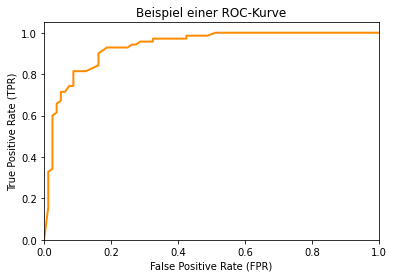

In [2]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, t = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate (FPR)')
ax.set_ylabel('True Positive Rate (TPR)')
ax.set_title('Beispiel einer ROC-Kurve')
plt.show()

Die ROC-Kurve zeigt die FPR auf der x-Achse und die TPR auf der y-Achse an. Man sieht alle möglichen Verhältnisse von FPR und TPR für verschiedene Grenzwerte. Da eine Hypothese eine hohe TPR und eine niedrige FPR erreichen sollte, liegt die optimale Güte in der oberen linken Ecke der ROC-Kurve, wo die FPR 0 und die TPR 1 ist. Dies wäre ein perfektes Ergebnis ohne Fehlklassifikationen. Die ROC-Kurve ist ein gutes Werkzeug, um eine geeignete Kombination aus TPR und FPR für einen Anwendungsfall auszuwählen. Wenn wir zum Beispiel eine TPR von mindestens 0,8 erreichen wollen, können wir erkennen, dass wir hierfür eine FPR von 0,05 in Kauf nehmen müssen. Dies ist in der folgenden Grafik mit einem Kreis markiert.

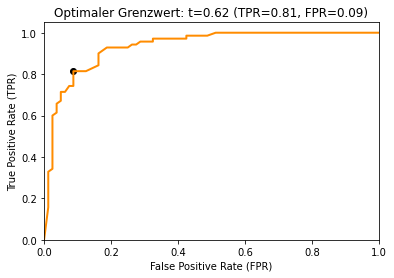

In [4]:
index = 0
while tpr[index]<0.8:
    index += 1

# Plot ROC Curve
fig,ax = plt.subplots()
ax.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.scatter(fpr[index], tpr[index], color='black', marker='o')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate (FPR)')
ax.set_ylabel('True Positive Rate (TPR)')
ax.set_title('Optimaler Grenzwert: t=%.2f (TPR=%.2f, FPR=%.2f)' % (t[index], tpr[index], fpr[index]))
plt.show()

### Area Under the Curve (AUC)

Wir können die ROC-Kurve auch benutzen, um ein Gütemaß zu definieren, indem wir die *Fläche unter der Kurve* (engl. *Area Under the Curve*, AUC) messen. Die Idee ist einfach: Wenn der optimale Wert der ROC-Kurve in der oberen linken Ecke liegt, ist die Fläche in diesem Fall 1. Je kleiner die Fläche unter der Kurve, desto niedriger sind die Werte von möglichen Kombinationen der TPR und FPR, was bedeutet, dass wir schlechtere Ergebnisse haben, unabhängig von einem konkreten Grenzwert $t$. Wenn wir also das Integral der ROC-Kurve berechnen, können wir damit schätzen, wie gut eine Hypothese ist. Daher kommt auch der Name dieses Gütemaßes: die Fläche unter der Kurve.

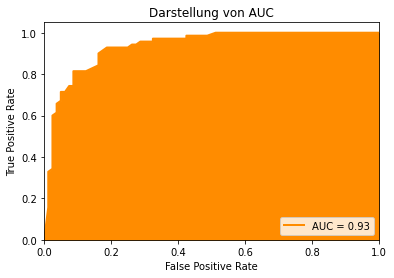

In [6]:
# Plot ROC Curve with AUC
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
ax.fill_between(fpr, 0, tpr, color='darkorange')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Darstellung von AUC')
plt.legend(loc="lower right")
plt.show()

Je näher der Wert von AUC an 1 ist, desto besser ist die Güte der Hypothese. Was die Interpretation angeht, hat AUC aber ein ähnliches Problem wie MCC: Während ein Wert von 1 optimal ist, ist der schlechteste Werte nicht etwa 0, sondern 0,5. Bei 0 hätte man eine FPR von 1 und eine TPR von 0. Wenn man jetzt das Ergebnis invertiert, hat man eine perfekte Klassifikation. Eine Fläche von 0,5 wiederum bekommt man durch die Diagonale, auf der $TPR=FPR$ gilt. Wenn TPR und FPR gleich groß sind, heißt das aber nichts anderes, als dass man so gut ist wie der Zufall. Daher sind Werte von AUC besser, je weiter sie von 0,5 entfernt sind. Falls die Werte jedoch unter 0,5 liegen, sollte man herausfinden, warum die Hypothese das Gegenteil der wahren Werte vorhersagt.

### Micro und Macro Averages

Die bisherigen Gütemaße haben wir über die binäre Confusion Matrix definiert. Die Definition der Accuracy können wir ohne Probleme auf mehr als zwei Klassen verallgemeinern, da es sich um den Anteil der korrekt klassifizierten Instanzen handelt. Für MCC gibt es auch eine Erweiterung für mehr als zwei Klassen, auf die wir hier jedoch nicht näher eingehen. Für die anderen Gütemaße können wir einen Trick anwenden: Statt einer nicht binären Confusion Matrix betrachten wir mehrere binäre Confusion Matrizen. Wie dieser Trick funktioniert, schauen wir uns direkt an einem Beispiel an. {numref}`tbl-confusion-matrix-rep` zeigt noch einmal die Confusion Matrix für die drei Klassen Wal, Bär und Sonstiges, die wir oben bereits betrachtet haben.


```{table} Beispiel von einer Confusion Matrix. Die Spalten stehen für die wahre Klasse und die Zeilen für die Vorhersagen (Wiederholung).
:name: tbl-confusion-matrix-rep

|               | Wal | Bär | Sonstiges |
|---------------|-----|-----|-----------|
| **Wal**       | 29  | 1   | 3         |
| **Bär**       | 2   | 22  | 13        |
| **Sonstiges** | 4   | 11  | 51        |
```

Wir können aus dieser Matrix nun Gütemaße für die einzelnen Klassen berechnen, zum Beispiel die TPR für die Klasse Wal als

$$TPR_{whale} = \frac{TP_{whale}}{TP_{whale}+FN_{whale}}.$$

Wir betrachten also die Klasse Wal als die positive Klasse einer binären Confusion Matrix und die anderen Klassen fassen wir in einer einzigen negativen Klasse zusammen. Basierend auf diesem Konzept können wir jetzt eine Erweiterung unserer Gütemaße für eine beliebige Anzahl von Klassen definieren durch das *Macro Averaging* und das *Micro Averaging*. Ein Macro Average ist das arithmetische Mittel eines Gütemaßes, wenn es individuell auf alle Klassen angewendet wird. Für die TPR ist das Macro Average definiert als

$$TPR_{macro} = \frac{1}{|C|}\sum_{c \in C}\frac{TP_{c}}{TP_{c}+FN_{c}}.$$


Mit dem Micro Averaging berechnen wir die Gütemaße direkt, indem wir die Formeln anpassen, um die Summe der Werte aller Klassen zu berechnen. Für die TPR ist das Micro Average definiert als

$$TPR_{micro} = \frac{\sum_{c \in C} TP_C}{\sum_{c \in C} TP_C + \sum_{c \in C} FN_C}.$$

Ob es sinnvoller ist, ein Macro oder ein Micro Average zu berechnen, hängt vom Anwendungsfall und den Daten ab. Wenn jede Klasse ähnlich viele Instanzen hat, sind die Ergebnisse des Macro und Micro Average nahezu identisch. Wenn es Class Level Imbalance in den Daten gibt, wenn also für mindestens eine Klasse erheblich mehr oder weniger Instanzen in den Daten enthalten sind, ist die Auswahl der Mittelungsmethode relevant. Beim Macro Average werden alle Klassen gleich gewichtet, unabhängig davon, wie viele Instanzen es in den Daten gibt. Dies liegt daran, dass die Gütemaße individuell für jede Klasse berechnet werden und anschließend ungewichtet gemittelt werden. Im Gegensatz hierzu ist der Einfluss der Klassen auf das Micro Average proportional zur Anzahl der Instanzen, die es für eine Klasse in den Daten gibt: Je mehr Daten für eine Klasse vorhanden sind, desto höher der Einfluss. Dies liegt daran, dass die Formeln so angepasst werden, dass die Summen direkt über die Instanzen der Klassen gebildet werden.

### Jenseits der Confusion Matrix

Alle Gütemaße, die wir betrachtet haben, basieren auf der Confusion Matrix. Dies ist der übliche Ansatz, um die Güte von Klassifikationsalgorithmen zu bestimmen. Die auf der Confusion Matrix basierenden Gütemaße beruhen jedoch alle auf einer Annahme, die in der Regel unrealistisch ist: Alle Fehler sind gleich wichtig. In der Praxis sind einige Fehler jedoch schlimmer als andere. Das Risiko ist bei einer großen Kreditsumme zum Beispiel höher als bei einer kleineren. Wenn ein Schuldner eine große Summe nicht zurückzahlen kann, ist eine falsch-positive Kreditwürdigkeit schlimmer als bei einer kleinen Kreditsumme. Daher sollte man sich neben der Confusion Matrix auch immer Gedanken über Kosten, Nutzen und Risiken machen, die mit wahr-positiven, falsch-positiven, wahr-negativen und falsch-negativen Ergebnissen verbunden sind. Man könnte zum Beispiel eine Kostenmatrix definieren, die die Gewinne und Verluste genauer aufschlüsselt. Hierdurch kann man eine bessere Kostenfunktion für den Anwen-dungsfall erhalten, was üblicherweise zu besseren Ergebnissen führt [^kdnuggets].

[^kdnuggets]: https://www.kdnuggets.com/2016/12/salford-costs-misclassifications.html

## Decision Surfaces

Im Folgenden verwenden wir eine visuelle Unterstützung, um zu zeigen, wie Hypothesen von verschiedenen Klassifikationsalgorithmen Instanzen klassifizieren: das *Decision Surface*. Bei einem Decision Surface handelt es sich um eine geometrische Interpretation von Klassifikationsergebnissen. Der Raum der Instanzen wird in verschiedene Regionen aufgeteilt, sodass jede Region die Instanzen gleich klassifiziert. Bei zweidimensionalen Daten heißt das, dass man farbige Flächen zeichnen kann, wobei die Farben die Klassen repräsentieren. In höherdimensionalen Räumen kann man die Decision Surfaces leider nicht gut darstellen. Wir nutzen die Kelchblattlänge und Kelchblattbreite der Irisdaten (siehe [Kapitel 4](kapitel_04)) als Beispieldatensatz, um zu zeigen, wie die Klassifikationsalgorithmen arbeiten.

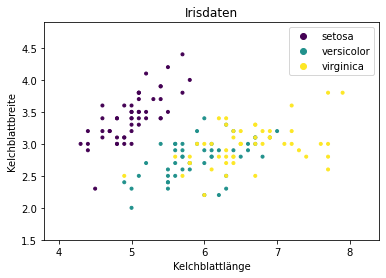

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

X, Y = load_iris(as_frame=True, return_X_y=True)
class_names = load_iris().target_names.tolist()
X = X.iloc[:, 0:2] # use only first two columns from iris data
X = X.rename(columns={'sepal length (cm)': 'Kelchblattlänge',
                      'sepal width (cm)': 'Kelchblattbreite'})

fig, ax = plt.subplots()
ax.set_xlim(X.iloc[:,0].min() - .5, X.iloc[:,0].max() + .5)
ax.set_ylim(X.iloc[:,1].min() - .5, X.iloc[:,1].max() + .5)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1],c=Y, marker='.')
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_title('Irisdaten')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
plt.show()

Man erkennt, dass die Setosas klar von den anderen Arten der Iris getrennt sind, während sich die Versicolor und Virginica überlappen. Wir nutzen jetzt die Hintergrundfarbe, um zu zeigen, wie ein Decision Surface aussieht: Lila für Setosa, Türkis für Versicolor und Gelb für Virginica. Als Beispiel definieren wir selbst Regeln zur Klassifikation:

- Alle Instanzen, deren Kelchblattlänge kleiner als 5,5 ist, werden als Setosa klassifiziert. 
- Alle Instanzen, deren Kelchblattlänge zwischen 5,5 und 6 liegt, werden als Versicolor klassifiziert. 
- Alle Instanzen, deren Kelchblattlänge größer als 6 ist, werden als Virginica klassifiziert. 

Hierdurch bekommen wir folgendes Decision Surface. 

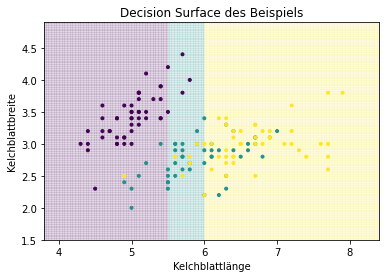

In [3]:
import numpy as np

class DummyModel:
    def fit(self, X, Y):
        pass
    
    def predict(self, X):
        result = np.ones(len(X)) # init everything as Versicolor
        result[X[:,0]<5.5] = 0 # rule for Setosa
        result[X[:,0]>6]   = 2 # rule for Virginica
        return result

def plot_decision_surface(model, X, Y, ax=None, title=None):
    h = .01 # step size in the mesh
    x_min, x_max = X.iloc[:,0].min() - .5, X.iloc[:,0].max() + .5
    y_min, y_max = X.iloc[:,1].min() - .5, X.iloc[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    model.fit(X, Y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.pcolormesh(xx, yy, Z, alpha=0.04, shading='auto')
    ax.scatter(X.iloc[:,0], X.iloc[:,1],c=Y, marker='.')
    
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    if title is None:
        title = str(model)
    ax.set_title(title)
    
plot_decision_surface(DummyModel(), X, Y, title='Decision Surface des Beispiels')

Die Gerade, wo sich die Farbe ändert, nennt man *Decision Boundary*. Die Decision Boundaries bestimmen die Struktur der Ergebnisse und sind eine wesentliche Eigenschaft von Klassifikationsalgorithmen, die sowohl praktische Auswirkungen auf die Ergebnisse als auch ein wichtiges Hilfsmittel für die mathematische Beschreibung und Analyse ist.

## $k$-Nearest Neighbor

Der erste Klassifikationsalgorithmus, den wir betrachten, ist der $k$*-Nearest-Neighbor*-Algorithmus. Dieser Algorithmus basiert auf der Idee, dass Instanzen derselben Klasse nah beieinander liegen. Diese Idee kennen wir bereits von den Clusteralgorithmen, die die Distanz als Maß für die Ähnlichkeit von Instanzen verwendet haben. Der einfachste Ansatz ist, dass man einfach jede Instanz so klassifiziert wie ihren nächsten Nachbarn. Für die Irisdaten würden wir mit dieser Strategie das folgende Decision Surface bekommen.


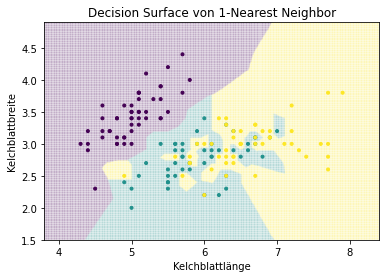

In [6]:
from sklearn.neighbors import KNeighborsClassifier

plot_decision_surface(KNeighborsClassifier(n_neighbors=1), X, Y, title="Decision Surface von 1-Nearest Neighbor")
plt.show()

Wir können dieses Konzept auf $k$ Nachbarn erweitern, um den vollständigen $k$-Nearest-Neighbor-Algorithmus zu erhalten. Hierfür weisen wir der Instanz die Klasse als das Mehrheitsvotum der $k$ nächsten Nachbarn zu. Hierdurch ändern sich auch die Decision Surfaces für verschiedene Werte von $k$.

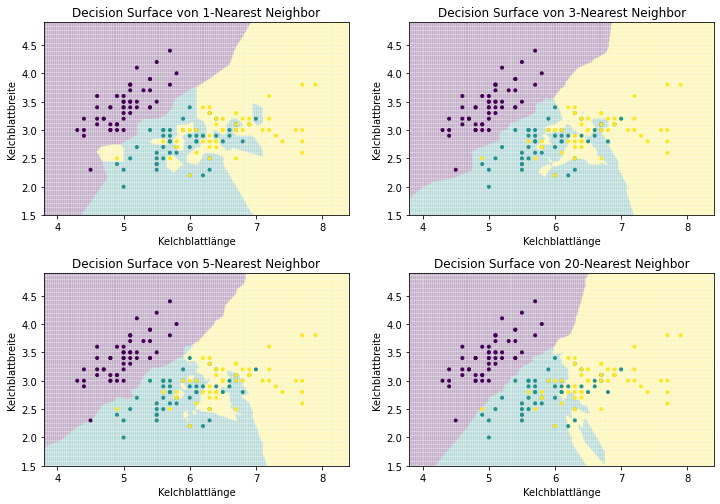

In [7]:
f, axes = plt.subplots(2, 2, figsize=(12, 7))
plot_decision_surface(KNeighborsClassifier(n_neighbors=1), X, Y,
                      title="Decision Surface von 1-Nearest Neighbor", ax=axes[0, 0])
plot_decision_surface(KNeighborsClassifier(n_neighbors=3), X, Y,
                      title="Decision Surface von 3-Nearest Neighbor", ax=axes[0, 1])
plot_decision_surface(KNeighborsClassifier(n_neighbors=5), X, Y,
                      title="Decision Surface von 5-Nearest Neighbor", ax=axes[1, 0])
plot_decision_surface(KNeighborsClassifier(n_neighbors=20), X, Y,
                      title="Decision Surface von 20-Nearest Neighbor", ax=axes[1, 1])
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

Man erkennt keine klare Struktur der Decision Boundaries zwischen den Decision Surfaces bei den vom $k$-Nearest Neighbor berechneten Hypothesen. Die Decision Boundaries haben viele scharfe Kanten und keine regelmäßige Struktur, wie man es erwarten würde, wenn diese zum Beispiel das Ergebnis einer differenzierbaren Funktion wären. Genau dies fehlt beim $k$-Nearest-Neighbor-Algorithmus auch: eine mathematische Beschreibung der Hypothese, die eine Generalisierung der Daten ist. Stattdessen haben wir ein *instanzbasiertes* Verfahren, das die Decision Boundaries durch den direkten Vergleich von Instanzen miteinander definiert. Wenn wir betrachten, wie sich das Ergebnis für größere Werte von   verändert, sehen wir, dass der Einfluss einzelner Datenpunkte reduziert wird. Bei $k=1 $sieht man zum Beispiel noch eine einzelne gelbe Instanz an der linken Seite der Grafik. Hierbei handelt es sich vermutlich um einen Ausreißer der gelben Klasse (Virginica). Die Konsequenz dieses Ausreißers ist, dass es eine relativ große gelbe Region gibt, obwohl dieser Bereich eher lila oder türkis sein sollte. Bei größeren Nachbarschaftsgrößen verschwindet dieser Effekt. Andererseits bedeutet eine große Nachbarschaft auch, dass Instanzen, die weiter weg liegen, die Klassifikation beeinflussen. Mit $k=20$ bekommt man hierdurch eine relativ scharfe Trennung von Türkis und Gelb. Dies liegt aber nicht an den Instanzen, die direkt im Bereich der Trennung liegen, sondern an den Instanzen, die weiter im Hintergrund liegen: Sobald es mehr gelbe Punkte im Hintergrund gibt, bleibt die Farbe stabil gelb. Durch diese größeren Abstände kann es jedoch auch eigenartige Effekte geben, wie man es zum Beispiel an der "türkisen Insel" in einem ansonsten stabil gelben Bereich sieht. Das Besondere hier ist, dass es in dieser Insel nicht einmal eine türkise Instanz gibt, sie entsteht also nur aufgrund von Datenpunkten, die relativ weit weg liegen.

Um den Effekt der Nachbarschaftsgröße weiter zu verdeutlichen, betrachten wir den Punkt (6, 3,5) im Detail. 

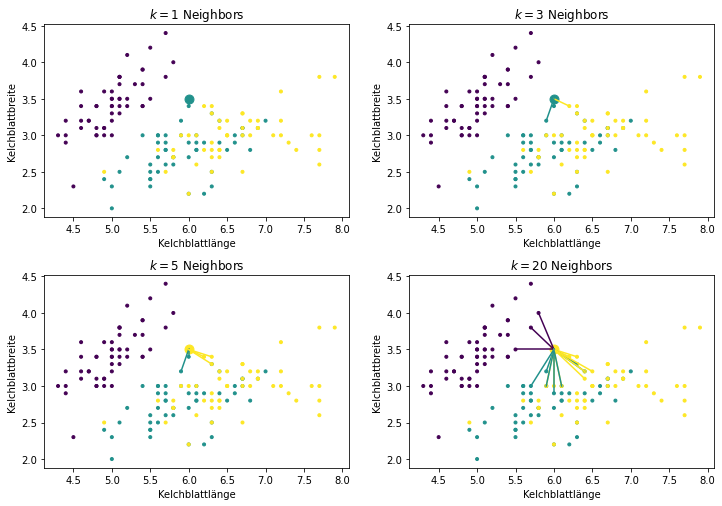

In [11]:
from sklearn.neighbors import NearestNeighbors

def plot_neighborhood(X, Y, k, pnt, ax=None):
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
    _, pnt_neighbors = nbrs.kneighbors(pnt)
    Y_pred = KNeighborsClassifier(n_neighbors=k).fit(X, Y).predict(pnt)
    if ax is None:
        plt.figure()
        ax = plt.gca()
    sc = ax.scatter(X.iloc[:,0], X.iloc[:,1],c=Y, marker='.')
    for i in range(0,k):
        pnt2 = X.iloc[pnt_neighbors[0][i]].values
        ax.plot([pnt[0][0], pnt2[0]], [pnt[0][1], pnt2[1]], color=sc.to_rgba(Y.iloc[pnt_neighbors[0][i]]))
    ax.scatter(pnt[0][0], pnt[0][1], s=80, color=sc.to_rgba(Y_pred[0]))
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    ax.set_title('$k=%i$ Neighbors' % k)
    
pnt = [[6, 3.5]]
f, axes = plt.subplots(2, 2, figsize=(12, 7))
plot_neighborhood(X, Y, 1, pnt, ax=axes[0,0])
plot_neighborhood(X, Y, 3, pnt, ax=axes[0,1])
plot_neighborhood(X, Y, 5, pnt, ax=axes[1,0])
plot_neighborhood(X, Y, 20, pnt, ax=axes[1,1])
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

Bei $k=1$ und $k=3$ wird dieser Punkt türkis markiert, da es zwei relativ nahe türkise Datenpunkte gibt, jedoch nur einen gelben. Bei $=5$ wechselt der Punkt zur gelben Klasse, da es jetzt zwei weitere gelbe Punkte in der Nachbarschaft gibt. Bei $k=20$ sieht man, wie der Punkt zwar gelb bleibt, aber sehr viele Punkte mittlerweile mitbestimmen, obwohl die meisten davon sehr weit weg von unserem Datenpunkt liegen.

## Entscheidungsbäume

Stellen wir uns vor, dass wir uns ein Auto kaufen wollen. Als Käufer hat man in der Regel ein paar Kriterien, die man sich überlegt, bevor man zum Händler geht: Es sollte ein 5-Türer mit einer gewissen Leistung und einem gewissen Kofferraumvolumen sein. Manche dieser Kriterien sind wichtiger als andere, sie werden also zuerst angewandt, um Autos auszuschließen. Während die Anzahl der Türen fest steht, könnte es zum Beispiel bei der Leistung einen gewissen Spielraum geben. Dies ist die Intuition von *Entscheidungsbäumen* (engl. *decision tree*): Es werden schrittweise logische Regeln auf die Merkmale angewandt, um Entscheidungen zu treffen. Die Entscheidungen sind als Baum organisiert.

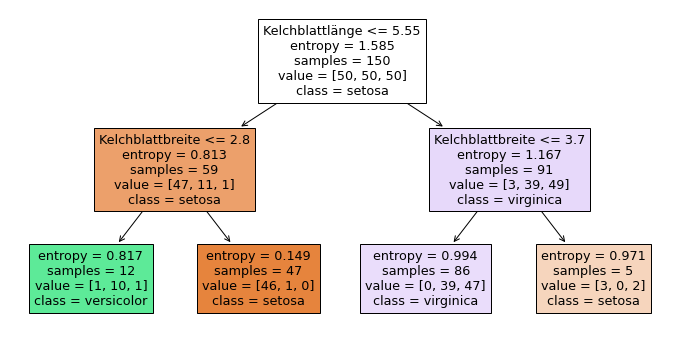

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf.fit(X, Y)
plt.figure(figsize=(12,6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

In diesem Entscheidungsbaum wird als Erstes eine Entscheidung mithilfe der Kelchblattlänge getroffen. Ist diese kleiner oder gleich 5,55, gehen wir nach links, andernfalls nach rechts. Außerdem sieht man noch weitere Informationen. Das Feld `entropy` ignorieren wir fürs Erste. Der Wert von `samples` gibt an, wie viele Instanzen in den Trainingsdaten zur Verfügung standen, um diese Entscheidung zu lernen. Der Wert von `value` gibt an, wie viele Instanzen von jeder Klasse in sample enthalten sind. Bei `class` sieht man, welche Klassifikation man hätte, wenn man keine weiteren Entscheidungen trifft. Basierend auf der Entscheidung werden die Daten partitioniert: 59 Instanzen haben eine Kelchblattlänge, die kleiner oder gleich 5,55 ist, bei 91 Instanzen ist die Kelchblattlänge größer. Dies können wir an den `samples` in den Knoten auf der linken bzw. rechten Seite ablesen. Bei den 59 Instanzen auf der linken Seite sind es 47 Instanzen aus der ersten Klasse (Setosa), 11 Instanzen aus der zweiten Klasse (Versicolor) und 1 Instanz aus der dritten Klasse (Virginica). Auf der untersten Ebene (den Blättern des Baums) werden keine weiteren Entscheidungen getroffen.


Für die Interpretation eines Entscheidungsbaums braucht man weder Exper-tenwissen noch ein tiefes Verständnis der Daten selbst. Das ist auch der große Vorteil von Entscheidungsbäumen: Die Klassifikation ist nachvollziehbar und Domänenexpertinnen können durch manuelle Analyse die Plausibilität der Regeln bewerten.

Das Decision Surface des obigen Baums sieht wie folgt aus. 

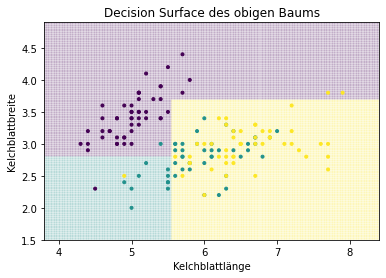

In [4]:
plot_decision_surface(clf, X, Y, title="Decision Surface des obigen Baums")
plt.show()

Wie man sieht, trennen die Decision Boundaries das Decision Surface durch achsenparallele Geraden. Dies ist eine Eigenschaft von Entscheidungsbäumen. Dadurch dass wir logische Entscheidungen der Form $\leq$ und $\geq$ (manchmal auch $=$) haben, werden die Daten durch jede Entscheidung in zwei Partitionen zerteilt, sodass die Entscheidung orthogonal zu einer Achse und parallel zu allen anderen Achsen ist.

Das Training von Entscheidungsbäumen basiert auf einem relativ einfachen rekursiven Algorithmus:

1. Beende den Algorithmus, wenn die Daten ausreichend "rein" sind, "zu klein" sind oder die maximale Tiefe des Entscheidungsbaums erreicht ist. 
2. Bestimme das "Merkmal mit dem höchsten Informationsgehalt" $X'$.
3. Partitioniere die Daten durch eine Regel für das Merkmal $X'$.
4. Wende den Algorithmus anfangend mit Schritt 1 rekursiv auf die Partionen an, um den linken und rechten Teilbaum zu erstellen. 

Wir müssen also nur das "Merkmal mit dem höchsten Informationsgehalt" finden, die Daten partitionieren und das so lange wiederholen, bis die Daten "rein" oder "zu klein" sind oder der Baum zu tief wird. Das Konzept von "zu klein" ist immer gleich: Die Anzahl der Instanzen in einer Partition unterschreitet einen vorher festgelegten Grenzwert. Durch dieses Kriterium können wir verhindern, dass Entscheidungen auf zu wenig Daten getroffen werden, und somit erzwingen, dass es für jede getroffene Entscheidung eine solide Datengrundlage gibt. Die maximale Tiefe beschränkt die Komplexität der Regeln. Die Tiefe des Baums ist definiert als die Anzahl der Entscheidungen, die getroffen werden, bevor die Klasse bestimmt wird. Der obige Baum hat zum Beispiel eine Tiefe von zwei. Zur Bestimmung der Reinheit, des Informationsgehalts und der Partitionen gibt es verschiedene Ansätze. Von diesen Ansätzen hängt auch ab, um was für eine Art von Entscheidungsbaum es sich handelt, zum Beispiel CART, ID3 oder C4.5.

Als Beispiel betrachten wir, wie man diese Konzepte durch die *Informationstheorie* definieren kann. Die Idee der Reinheit lässt sich informationstheoretisch durch die Unsicherheit der Daten fassen und der Informationsgehalt als die *gemeinsame Information* (engl. *mutual information*), durch die man den *Informationsgewinn* (engl. *information gain*) messen kann. Da sich die Informationstheorie mit Zufallsvariablen befasst, interpretieren wir hier alles als Zufallsvariablen: Die Klassifikation von Instanzen ist eine Zufallsvariable $C$ und unsere Merkmale sind die Zufallsvariablen $X_1, ..., X_m$. Das Kernkonzept der Informationstheorie ist die *Entropie*. Je höher die Entropie einer Zufallsvariablen ist, desto unsicherer und zufälliger ist der Ausgang eines Zufallsexperiments mit dieser Variablen. Die Entropie einer Zufallsvariablen, die einen fairen Münzwurf beschreibt (50% Kopf, 50% Zahl), ist zum Beispiel eins, der höchstmögliche Wert der Entropie. Die Entropie einer Zufallsvariablen für eine manipulierte Münze, die immer auf Kopf landet, hätte eine Entropie von null, es gäbe also keine Unsicherheit über das Ergebnis. Wenn wir somit Entscheidungen mit einer hohen Sicherheit treffen wollen, müssen wir Partitionen finden, sodass die Entropie der Klassifikation $C$ minimiert wird. Die Entropie von $C$ ist definiert als

$$H(C) = -\sum_{c \in C} p(c) \log p(c),$$

wobei $p(c)$ die Wahrscheinlichkeit ist, dass eine Instanz einer Partition zu Klasse $c$ gehört. Sobald die Entropie $H(C)$ unter einen Grenzwert fällt, ist die Entscheidung sicher genug und die Partition "rein". 

Die *bedingte Entropie* können wir nutzen, um abzuschätzen, wie viel Wissen über die Klasse wir durch ein Merkmal bekommen. Hierzu gibt die bedingte Entropie die Unsicherheit der Klasse $C$ an, wenn ein Merkmal $X'$ vollständig bekannt ist. Die Entropie der Klassifikation $C$ bezogen auf das Merkmal $X'$ ist definiert als

$$H(C|X') = -\sum_{x \in X'} p(x) \sum_{c \in C} p(c|x) \log p(c|x),$$


wobei $p(c|x)$ die bedingte Wahrscheinlichkeit der Klasse $c$ für einen Wert $x$ des Merkmals $X' \in \{X_1, ..., X_m\}$ ist. Die bedingte Entropie ist also ein Maß dafür, wie hoch der *Informationsgewinn* über $C$ mit $X'$ ist. Je niedriger die bedingte Entropie, desto höher der Informationsgewinn. Daher nennt man ein Merkmal *informativ*, wenn es die bedingte Entropie der Klassifikation reduziert. Wenn man die Entropie der Klassifikation mit der bedingten Entropie kombiniert, erhält man den *Informationsgewinn* durch die Reduktion der Entropie als 

$$I(C; X') = H(C)-H(C|X').$$

Das informativste Merkmal ist also das Merkmal, das den Informationsgewinn maximiert. Sobald man dieses Merkmal gefunden hat, kann man eine Regel bestimmen, sodass die mittlere Entropie der Klassifikation der Partitionen minimiert wird.

Oben haben wir bereits ein Decision Surface für einen Entscheidungsbaum mit einer niedrigen Tiefe von zwei betrachtet. Dies hat uns zwar geholfen, die Struktur von Entscheidungsbäumen und der Entscheidungen zu verstehen, es reicht jedoch in der Regel nicht aus, um ein gutes Ergebnis aus einem Datensatz zu erzielen. Hierfür benötigt man mehr Entscheidungen, also einen tieferen Entscheidungsbaum. Wenn wir die Tiefe nicht beschränken und keinen Grenzwert für zu wenige Daten, um eine Entscheidung zu treffen, angeben, bekommen wir folgendes Decision Surface.

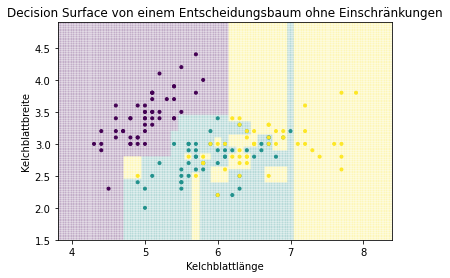

In [5]:
plot_decision_surface(DecisionTreeClassifier(), X, Y, title="Decision Surface von einem Entscheidungsbaum ohne Einschränkungen")
plt.show()

Man sieht, dass sehr viel mehr Entscheidungen getroffen werden: Jede achsenparallele Decision Boundary ist eine Entscheidung. Dies führt aber leider zu *Overfitting*, das heißt, es wurden einzelne Datenpunkte auswendig gelernt. Das erkennt man zum Beispiel an der kleinen gelben Fläche, die man etwa bei Kelchblattlänge sieben sieht. Hier liegt nur eine gelbe Instanz mitten in einer ansonsten türkisen Umgebung. Hierfür gibt es noch einige weitere Beispiele, etwa auch zwischen dem lila und dem türkisen Bereich. Um zu verhindert, dass so etwas passiert, müssen wir die erlaubten Entscheidungen beschränken. Wenn wir fordern, dass nur Partitionen mit mindestens fünf Instanzen erlaubt sind, verschwinden diese kleinen Bereiche.

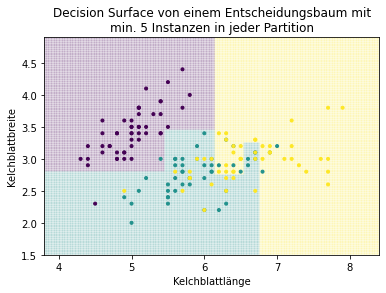

In [7]:
plot_decision_surface(DecisionTreeClassifier(min_samples_leaf=5), X, Y, title="Decision Surface von einem Entscheidungsbaum mit\nmin. 5 Instanzen in jeder Partition")
plt.show()

## Random Forests

Mit einem *Random Forest* kombiniert man viele Entscheidungsbäume zu einem Klassifikationsmodell. Die einzelnen Entscheidungsbäume nennt man *Random Tree*. Man spricht hierbei von *Ensemble Learning*, da der Random Forest ein Ensemble von Random Trees ist. Wie man aus vielen Entscheidungsbäumen die Klassifikation eines Random Forest erhält, sieht man im Folgenden.

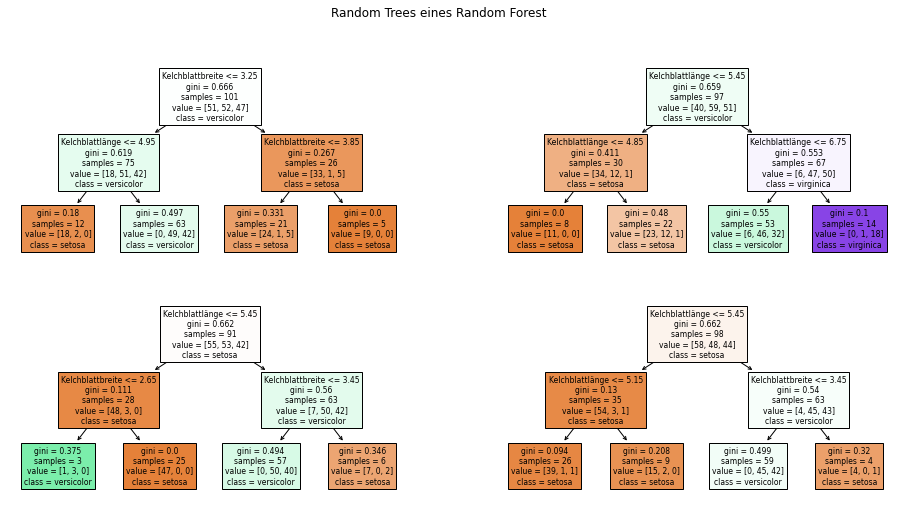

In [5]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Please note that the parameters we use here are not good and should not be used
# for any real examples. We use only four random trees so that we can better demonstrate 
# the example. Usually, you should use hundreds of trees and more are better, but require
# more runtime (both for training and predictions). 
randomforest = RandomForestClassifier(n_estimators=4, max_depth=2, random_state=42)
randomforest.fit(X, Y)

f, axes = plt.subplots(2, 2, figsize=(16, 8))
plot_tree(randomforest.estimators_[0], filled=True, feature_names=X.columns, class_names=class_names, ax=axes[0,0])
plot_tree(randomforest.estimators_[1], filled=True, feature_names=X.columns, class_names=class_names, ax=axes[0,1])
plot_tree(randomforest.estimators_[2], filled=True, feature_names=X.columns, class_names=class_names, ax=axes[1,0])
plot_tree(randomforest.estimators_[3], filled=True, feature_names=X.columns, class_names=class_names, ax=axes[1,1])
plt.suptitle("Random Trees eines Random Forest")
plt.show()

Jeder einzelne Random Tree ist für sich genommen kein gutes Klassifikationsmodell. Dies sieht man gut an den Decision Surfaces. 

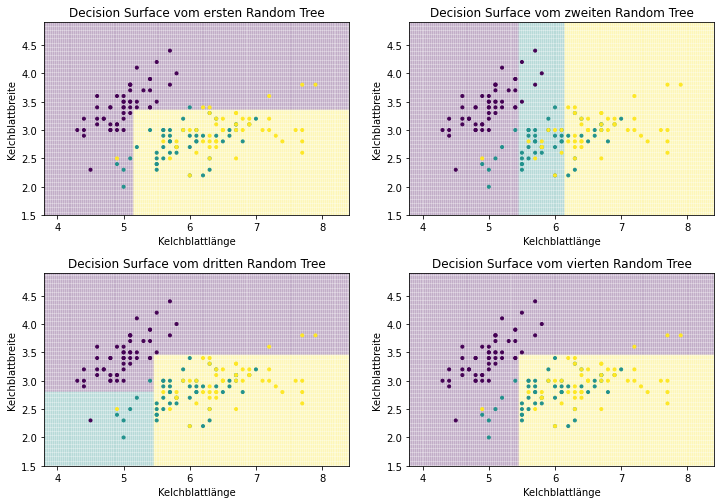

In [6]:
f, axes = plt.subplots(2, 2, figsize=(12, 7))
plot_decision_surface(randomforest.estimators_[0], X, Y, title="Decision Surface vom ersten Random Tree", ax=axes[0,0])
plot_decision_surface(randomforest.estimators_[1], X, Y, title="Decision Surface vom zweiten Random Tree", ax=axes[0,1])
plot_decision_surface(randomforest.estimators_[2], X, Y, title="Decision Surface vom dritten Random Tree", ax=axes[1,0])
plot_decision_surface(randomforest.estimators_[3], X, Y, title="Decision Surface vom vierten Random Tree", ax=axes[1,1])
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

Der erste und der vierte Random Tree sind so schlecht, dass es keine türkise Region gibt. Für sich genommen haben wir also *schwache Klassifikationsmodelle* (engl. *weak classifier*). Wenn wir diese vier schwachen Klassifikationsmodelle durch Mitteln der Vorhersagen kombinieren, bekommen wir ein besseres Ergebnis. 

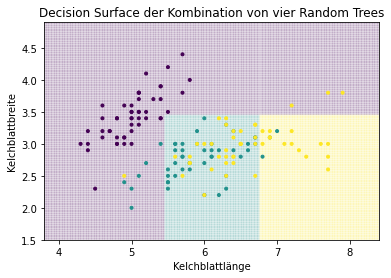

In [7]:
plot_decision_surface(randomforest, X, Y, title="Decision Surface der Kombination von vier Random Trees")
plt.show()

Dass man aus vielen schwachen Modellen ein gutes Ergebnis bekommt, ähnelt dem Prinzip des Publikumsjokers: Wenn man eine zufällige Person fragt, ist die Wahrscheinlichkeit, eine richtige Antwort zu bekommen, niedriger, als wenn man eine Umfrage macht. Genauso verhält es sich auch mit schwachen Klassifikationsmodellen. Jeder der Random Trees ist zwar schlecht, aber jeder Random Tree hat auch Stärken. Zusammengenommen addieren sich die Stärken auf und überdecken dadurch die Schwächen. Üblicherweise nutzt man bei einem Random Forest nicht nur vier Bäume, sondern Hunderte oder sogar Tausende von Bäumen. Hier ist das Ergebnis mit 1000 Random Trees.

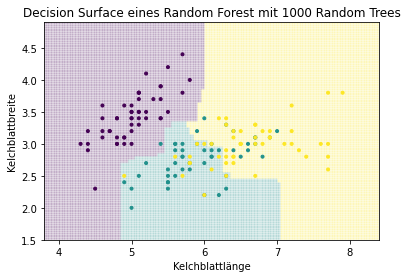

In [8]:
plot_decision_surface(RandomForestClassifier(n_estimators=1000, max_depth=2), X, Y, title="Decision Surface eines Random Forest mit 1000 Random Trees")
plt.show()

Bisher haben wir nur erklärt, wie ein Random Forest aus einem *Ensemble* zu einem einzelnen Ergebnis kommt. Warum wir überhaupt unterschiedliche Entscheidungsbäume für die gleichen Trainingsdaten erhalten, ist noch unklar. Schließlich ist der Algorithmus zum Training von Entscheidungsbäumen deterministisch: Wenn man einen Entscheidungsbaum wie im vorigen Abschnitt zwei Mal mit den gleichen Daten trainiert, bekommt man zwei identische Entscheidungsbäume. Was uns also noch fehlt, ist das Verständnis der Rolle des Zufalls beim Training von Random Forests.

Wenn man sich die einzelnen Random Trees genau anschaut, sieht man bereits einige Hinweise darauf, was randomisiert ist. Hier ist noch einmal der erste der vier Entscheidungsbäume von oben.

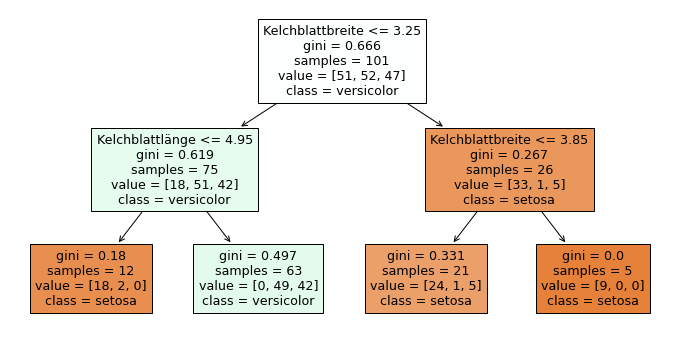

In [17]:
plt.figure(figsize=(12,6))
plot_tree(randomforest.estimators_[0], filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

Man sieht, dass es in der Wurzel des Baums (die erste Entscheidung) nur 101 Instanzen statt der gesamten 150 Instanzen gibt. Außerdem sind nicht von jeder Irisart gleich viele Instanzen vorhanden. Dieser Entscheidungsbaum wurde also offensichtlich nicht mit den originalen Irisdaten trainiert. Was wir hier sehen, ist die erste Randomisierung des Trainings: Als Trainingsdaten bekommt jeder Random Tree ein *Bootstrap Sample* der Daten. Wenn wir 150 Instanzen in den Trainingsdaten haben, heißt das, dass wir 150 Instanzen *mit Zurücklegen* aus den Trainingsdaten ziehen. Da wir mit Zurücklegen ziehen, bekommen wir einige Instanzen mehrfach, andere gar nicht. Im Mittel bekommt man etwa 63,2% verschiedene Instanzen, der Rest sind Duplikate. Alle Random Trees erhalten also andere Trainingsdaten. Bitte beachten Sie, dass `samples` bei einem Random Tree nicht die Anzahl der Instanzen, sondern die Anzahl der Instanzen ohne Duplikate angibt. Das Ziehen von Bootstrap Samples, um mehrere Klassifikationsmodelle zu trainieren, nennt man auch *Bagging*, was die Kurzform für *Bootstrap Aggregating* ist.

Es gibt noch eine weitere zufällige Komponente im Training von Random Forests. Nicht jeder Random Tree erhält alle Merkmale. Stattdessen bekommt jeder Random Tree nur eine Teilmenge der Merkmale zur Verfügung gestellt. Üblicherweise verwendet man die Quadratwurzel der Anzahl der Merkmale pro Baum. Wenn es vier Merkmale gibt, erhält ein Random Tree also nur Zugriff auf $\sqrt{4}=2$ Merkmale. Der Grund hierfür ist, dass sich die Bäume sonst möglicherweise stark ähneln. Wenn ein Merkmal für die gesamten Daten informativ ist, ist es in der Regel auf einem Bootstrap Sample ähnlich informativ. Daher wäre das Risiko groß, dass die Random Trees die gleiche Struktur haben. Wenn nur eine Teilmenge von Merkmalen zur Verfügung steht, haben auch schwächere Merkmale eine Chance, benutzt zu werden und damit ihre Information in den Random Forest einzubringen. So wird sichergestellt, dass die einzelnen Random Trees auch wirklich unterschiedliche Stärken und Schwächen haben.

## Logistische Regression

Die *logistische Regression* (engl. *logistic regression*) berechnet die *Chance* bzw. die *Odds*, dass eine Instanz zu einer Klasse gehört. Die Chancen sind ein Konzept der Statistik, das man zum Beispiel bei Sportwetten wiederfindet. Sei $P(Y=c)$ die Wahrscheinlichkeit, dass eine Zufallsvariable $Y$ den Wert $c$ annimmt. Die Chancen, dass $Y$ gleich $c$ ist, sind dann definiert als

$$odds(c) = \frac{P(Y=c)}{1-P(Y=c)}.$$

Die Bedeutung der Chancen kann man sich gut an einem Beispiel klarmachen: Unsere Zufallsvariable $Y$ könnte die Wahrscheinlichkeit, eine Prüfung zu bestehen, modellieren und für $c=pass$ mit $P(Y=pass)=0,75$ ist die Wahrscheinlichkeit 75%, dass die Prüfung bestanden wird. Die Chancen, dass die Prüfung bestanden wird, sind damit

$$odds(pass) = \frac{0.75}{1-0.75} = 3.$$

Mit anderen Worten, die Chancen, die Prüfung zu bestehen, sind drei zu eins.

Die Chancen sind verwandt mit der Logit-Funktion, die als
$$logit(P(Y=c)) = \ln \frac{P(Y=c)}{1-P(Y=c)}$$

definiert ist. Dies ist nichts anderes als der natürliche Logarithmus der Chancen von $c$. Von dieser Funktion hat die logistische Regression auch ihren Namen. Wenn wir sagen, dass unsere Zufallsvariable $Y$ die Wahrscheinlichkeit modelliert, dass eine Instanz zu einer Klasse gehört und   eine Klasse ist, dann ist $logit(P(Y=c))$ nichts anderes als der Logarithmus der Chancen, dass diese Instanz zu dieser Klasse gehört. Die Regression, die verwendet wird, ist eine einfache lineare Regression (siehe [Kapitel 8](kapitel_08)) der Form

$$logit(P(Y=c)) = \ln \frac{P(Y=c)}{1-P(Y=c)} = b_0 + b_1x_1 + ... + b_mx_m,$$

wobei die Merkmale numerisch sein müssen, also $\mathcal{F} \subseteq \mathbb{R}$. Im zweidimensionalen Fall beschreibt die Formel der linearen Regression eine Gerade, im dreidimensionalen Fall eine Ebene, im  $m$-dimensionalen Fall eine Hyperebene. Das Decision Surface der logistischen Regression der Irisdaten sieht wie folgt aus.

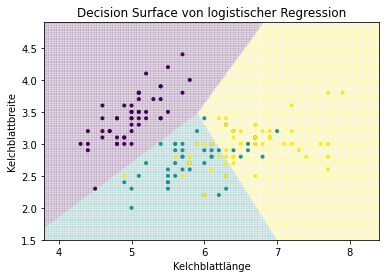

In [9]:
from sklearn.linear_model import LogisticRegression

plot_decision_surface(LogisticRegression(), X, Y, title="Decision Surface von logistischer Regression")

Die Entscheidungen werden also durch Geraden getroffen, die den Merkmalsraum unterteilen. 

Ein großer Vorteil der logistischen Regression ist, dass man den Einfluss der Merkmale auf die Klassifikation direkt nachvollziehen kann. Dies liegt an der Struktur des Regressionsmodells und der Logit-Funktion. Mit einigen Umformungen bekommen wir Folgendes.

$$
\begin{split}
&\ln \frac{P(Y=c)}{1-P(Y=c)} = b_0 + b_1x_1 + ... + b_mx_m \\
\Rightarrow\quad &\frac{P(Y=c)}{1-P(Y=c)} = \exp( b_0 + b_1x_1 + ... + b_mx_m ) \\
\Rightarrow\quad &odds(c) = \exp( b_0 ) \cdot \Pi_{i=1}^m \exp(b_ix_i) \\
\end{split}
$$

Die Chancen einer Klasse sind also das Produkt der Exponenten von $b_ix_i$. Die Auswirkung des $i$-ten Merkmals auf die Chancen ist damit $\exp(b_ix_i)$. Man bezeichnet $\exp(b_i)$ auch als die *Odds Ratio* des $i$-ten Merkmals. Die Odds Ratio definiert, wie sehr sich die Chancen der Klasse in Abhängigkeit eines Merkmals ändern. Eine Odds Ratio von zwei bedeutet zum Beispiel, dass sich die Chancen verdoppeln, wenn sich der Wert des Merkmals um eins erhöht. Im Allgemeinen bedeutet eine Odds Ratio größer als eins, dass sich die Chancen erhöhen, wenn sich der Wert des Merkmals erhöht. Ein Wert kleiner 1 heißt, dass die Chancen sinken, wenn sich der Wert des Merkmals verringert. Da man den Logarithmus verwenden muss, um aus $\exp(b_i)$ den eigentlichen Koeffizienten zu berechnen, spricht man bei den Koeffizienten auch von den *Log Odds Ratios*.

Betrachten wir jetzt die Odds Ratios der logistischen Regression für die Irisarten.

In [10]:
lr = LogisticRegression()
lr.fit(X,Y)
odds_df = pd.DataFrame(np.exp(lr.coef_), index=class_names, columns=X.columns)
odds_df['Achsenabschnitt'] = np.exp(lr.intercept_)
odds_df

,Kelchblattlänge,Kelchblattbreite,Achsenabschnitt
setosa,0.066610,10.216701,2733.180675
versicolor,1.845467,0.207923,6.328398
virginica,8.134952,0.470746,0.000058


Anhand der Odds Ratios sehen wir, dass sich die Chancen, dass es sich um eine Setosa handelt, stark mit der Kelchblattbreite erhöhen und mit der Kelchblattlänge reduzieren. Außerdem erkennen wir, dass die Chancen, dass es sich um eine Versicolor oder Virginica handelt, steigen, wenn die Kelchblattlänge erhöht und die Kelchblattbreite reduziert wird. Der *Achsenabschnitt* markiert die Chancen, wenn der Wert für alle Merkmale gleich null ist, es sich also um   aus der Gleichung der logistischen Regression handelt. Alle Änderungen der Merkmale müssen also in Relation zum Achsenabschnitt betrachtet werden. Da der Achsenabschnitt für Versicolor größer ist als für Virginica, gibt es eine Region, wo die Chancen für Versicolor größer sind, obwohl sich die Chancen, dass es sich um eine Virginica handelt, stärker erhöhen, sowohl in Bezug auf die Kelchblattlänge als auch die Kelchblattbreite.

> **Bemerkung:**
>
> In diesem Fall ist der Achsenabschnitt etwas irreführend. Während der Achsenabschnitt für Setosa sehr hoch ist, sind die Chancen für die Kelchblattlänge sehr niedrig. Da alle Instanzen eine Kelchblattlänge größer als vier haben, verschwindet dieser hohe Achsenabschnitt, bis man bei den Daten angekommen ist. Um solche Effekte zu vermeiden, sollte man die Daten immer zentrieren, sodass die Werte aller Merkmale symmetrisch zur Null sind. Hierfür ist zum Beispiel die *Z-Score-Standardisierung* geeignet. Wenn die Interpretation der Koeffizienten das Hauptziel ist, sollte man außerdem nicht scikit-learn verwenden, sondern stattdessen ein Paket wie statsmodels. Hier ist die Regressionsanalyse deutlich detaillierter, insbesondere was die Analyse der statistischen Signifikanz der Ergebnisse angeht.

## Naive Bayes

Der *Satz von Bayes* (engl. *Bayes Law*) ist eines der fundamentalen Gesetze der Stochastik und definiert als

$$P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)}.$$

Der Satz von Bayes ist ein wichtiges Hilfsmittel, um Aufgaben mit bedingten Wahrscheinlichkeiten zu lösen. Wenn wir unsere Merkmale als Zufallsvariable $X$ interpretieren und unsere Klassifikation als Zufallsvariable $Y$, dann ist $P(Y|X)$ die bedingte Wahrscheinlichkeit der Klassifikation, wenn die Merkmale bekannt sind. In der Theorie ist dies die perfekte Scoring-Funktion für eine Hypothese. Wir haben also

$$P(c|x_1, ..., x_m) = \frac{P(x_1, ..., x_m|c)P(c)}{P(x_1, ..., x_m)}$$

für eine Klasse $c \in C$ und eine Instanz $(x_1, ..., x_m) \in \mathcal{F}$. Aus dem Satz von Bayes folgt, dass die Wahrscheinlichkeit der Klasse $c$ für die Instanz $(x_1, ..., x_m)$ gegeben ist als die Wahrscheinlichkeit, die Instanz bei Daten der Klasse $c$ zu beobachten, multipliziert mit der Wahrscheinlichkeit, diese Klasse zu beobachten, und geteilt durch die Wahrscheinlichkeit, die Instanz zu beobachten, unabhängig von der Klasse. Das Problem des Satzes von Bayes ist, dass man die Wahrscheinlichkeiten $P(x_1, ..., x_m|c)$ und $P(x_1, ..., x_m)$ in der Regel nicht berechnen kann, da man entweder detailliertes Wissen über die Verteilung der gemeinsamen Wahrscheinlichkeit aller Merkmale braucht oder eine sehr große Menge von Daten, sodass es für jede Kombination der Werte von Merkmalen auch Trainingsdaten gibt. Beides ist in der Praxis unrealistisch.

Stattdessen vereinfachen wir den Satz von Bayes zu *Naive Bayes*. Der Hauptaspekt von Naive Bayes ist die als *Naive Assumption* bekannte Annahme, dass die Merkmale bezogen auf die Klasse unabhängig voneinander sind. Für die Irisdaten würde das bedeuten, dass die Kelchblattlänge einer Setosa unabhängig von der Kelchblattbreite einer Setosa ist. Die Daten zeigen, dass dies eindeutig nicht der Fall ist. Da diese Annahme fast nie erfüllt ist, ist sie daher ziemlich naiv. Aus mathematischer Sicht ist diese Annahme jedoch äußerst hilfreich, da für bedingte Unabhängigkeit gilt, dass

$$P(x_1, ..., x_m | c) = \Pi_{i=1}^m P(x_i|c),$$

und wir somit nicht mehr die gemeinsame Wahrscheinlichkeit der Merkmale berechnen müssen, sondern stattdessen nur noch die Wahrscheinlichkeiten für die einzelnen Merkmale, bezogen auf die Klasse. Wenn wir dies in den Satz von Bayes einsetzen, bekommen wir

$$P(c|x_1, ..., x_m) = \frac{\Pi_{i=1}^m P(x_i|c)P(c)}{P(x_1, ..., x_m)}.$$

Leider gibt es immer noch die gemeinsame Wahrscheinlichkeit $P(x_1, ..., x_m)$ im Nenner. Diese Wahrscheinlichkeit ist aber unabhängig von der Klasse $c$. Wenn wir statt der exakten Wahrscheinlichkeit nur eine Scoring-Funktion brauchen, können wir den Nenner einfach weglassen, ohne dass sich die Klasse, die den höchsten Score bekommt, ändert. Damit haben wir als Scoring-Funktion für Naive Bayes

$$score(c|x_1, ..., x_m) = \Pi_{i=1}^m P(x_i|c)P(c).$$


Um die Scoring-Funktion berechnen zu können, müssen wir $P(x_i|c)$ und $P(c)$ berechnen. $P(c)$ können wir einfach als Anteil der Instanzen der Klasse $c$ von allen Instanzen berechnen.

Die beiden wichtigsten Ansätze zur Berechnung von $P(x_i|c)$ sind *Multinomial Naive Bayes* und *Gaussian Naive Bayes*. Beim Multinomial Naive Bayes berechnet man $P(x_i|c)$ als Anteil der Instanzen der Klasse $c$, die den Wert $x_i$ haben. Dieser Ansatz funktioniert sehr gut für kategorische Merkmale und Anzahlen. Für numerische Merkmale funktioniert Multinomial Naive Bayes in der Regel nicht, da die Anzahl der Instanzen, die genau einen bestimmten numerischen Wert annehmen, häufig eins ist, da es unwahrscheinlich ist, exakt den gleichen Wert mehrfach zu beobachten, wenn eine kontinuierliche Wahrscheinlichkeitsverteilung zugrunde liegt. Für solche Merkmale ist Gaussian Naive Bayes besser geeignet. Beim Gaussian Naive Bayes nimmt man an, dass die Merkmale normalverteilt sind, und schätzt die Wahrscheinlichkeit $P(x_i|c)$ durch die Dichtefunktion der Normalverteilung für dieses Merkmal.

Unten sieht man die Decision Surface von Multinomial Naive Bayes und Gaussian Naive Bayes für die Irisdaten.

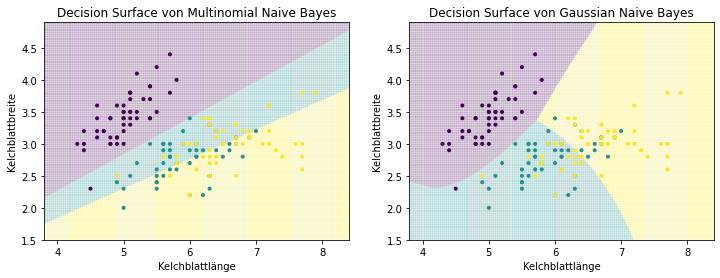

In [14]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

f, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_decision_surface(MultinomialNB(), X, Y, title="Decision Surface von Multinomial Naive Bayes", ax=axes[0])
plot_decision_surface(GaussianNB(), X, Y, title="Decision Surface von Gaussian Naive Bayes", ax=axes[1])
plt.show()

Die Decision Boundaries von Multinomial Naive Bayes sind linear, bei Gaussian Naive Bayes werden die Decision Boundaries durch quadratische Gleichungen beschrieben. Wir sehen, dass Multinomial Naive Bayes nicht gut funktioniert, insbesondere die Trennung von Türkis und Gelb sieht nicht sinnvoll aus. Dies war aber zu erwarten, da es sich um numerische Daten handelt. Der Gaussian Naive Bayes hat dieses Problem nicht und liefert bessere Ergebnisse.

## Support Vector Machines (SVMs)

*Support Vector Machines* (SVMs) betrachten die Klassifikation als Optimierungsproblem und definieren hierdurch eine Strategie, die Decision Boundary auszuwählen. Wir betrachten hier nur die Grundidee von SVMs und nicht die vollständige mathematische Beschreibung. Die Idee von SVMs können wir uns gut mithilfe von Decision Boundaries veranschaulichen.

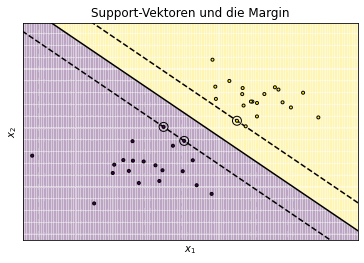

In [15]:
from sklearn.svm import SVC

# we create 40 separable points
np.random.seed(0)
X_linear = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y_linear = [0] * 20 + [1] * 20

# then we fit the SVM
clf = SVC(kernel='linear')
clf.fit(X_linear, Y_linear)

#  now we get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=Y_linear, zorder=10,
            edgecolors='k',  marker='.')

# now we plot the decision surface
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z, alpha=0.1, shading='auto')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.title('Support-Vektoren und die Margin')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.show()

Wir sehen zwei Gruppen von Instanzen, eine in der gelben und eine in der lila Gegend. Diese Daten kann man sehr einfach durch eine Gerade trennen. Wir haben sogar gleich drei solche Geraden eingezeichnet und es gibt noch viele weitere, zum Beispiel mit einer anderen Steigung. Alle diese Geraden liefern für die gegebenen Daten die gleiche Klassifikation. Die drei Geraden sind jedoch nicht beliebig gewählt, sondern so, dass sie die *Margin* bzw. die Lücke zwischen den Daten maximieren. Die gestrichelten Geraden haben den höchstmöglichen Abstand voneinander, sodass noch alle Datenpunkte korrekt klassifiziert werden. Die durchgezogene Gerade liegt genau in der Mitte der gestrichelten Geraden. Das heißt, dass sie den Abstand zu den Daten maximiert. Dadurch dass die Gerade genau in der Mitte liegt, gilt auch, dass die umkringelten Instanzen die gleiche Entfernung von der durchgezogenen Geraden haben. Der Abstand ist also zu beiden Klassen gleich groß. Man spricht hierbei von der *Maximierung der Margin*.

Die Maximierung der Margin ist genau das Optimierungsziel der SVMs: Eine Gerade (bzw. Hyperebene) zu bestimmen, die so weit wie möglich von allen Datenpunkten entfernt ist und die Klassen trennt. Den Grund für dieses Optimierungsziel kann man sich so erklären:

- Unsere Trainingsdaten sind nur eine Stichprobe, es gibt also noch weitere Instanzen. 
- Wenn es noch weitere Instanzen gibt, ist es naheliegend, dass es auch weitere Instanzen in den Grenzbereichen der Verteilungen der Klassen gibt.
- Wenn es weitere Instanzen in den Grenzbereichen gibt, wird es auch Instanzen geben, die im Bereich zwischen den gestrichelten Geraden liegen, wobei diese Instanzen vermutlich nah an den Geraden liegen würden.
- Wenn wir die gestrichelten Geraden zur Klassifikation verwenden würden, gäbe es Fehlklassifikationen.
- Wenn wir die durchgezogene Gerade zur Klassifikation nehmen, maximieren wir die Margin und minimieren dadurch die Wahrscheinlichkeit, dass neue Instanzen im Grenzbereich falsch klassifiziert werden.

Ihren Namen haben die SVMs von den *Support-Vektoren*. Dies sind die umkringelten Instanzen auf den gestrichelten Geraden. Da diese Punkte den minimalen Abstand zwischen den Klassen repräsentieren, sind sie für die Definition der Margin verantwortlich. Würde man nur mit den Support-Vektoren trainieren, bekäme man trotzdem das gleiche Ergebnis, da es keine bessere Trennung zwischen diesen Datenpunkten gibt. Im Beispiel würden also die drei umkringelten Datenpunkte theoretisch für das Training ausreichend sein. Dennoch ist es natürlich besser, mehr Daten zu haben, da man dadurch die korrekte Lage der Grenze zwischen den Klassen besser schätzen kann.

SVMs wären jedoch nicht so erfolgreich, wenn man nur eine lineare Trennung der Daten trainieren könnte, wie wir sie im Beispiel sehen. Um eine mächtigere nicht lineare Repräsentation der Decision Boundary zu ermöglichen, setzen die SVMs auf das Konzept der *Feature Expansion*. Hierbei wird der Merkmalsraum in einen höherdimensionalen Raum transformiert. In dem hochdimensionalen Raum wird dann eine lineare Trennung berechnet. Im ursprünglichen Merkmalsraum sieht diese Trennung dann jedoch nicht mehr linear aus, sondern hängt von der Raumtransformation ab. Dieses recht abstrakte Konzept können wir uns wie folgt veranschaulichen.

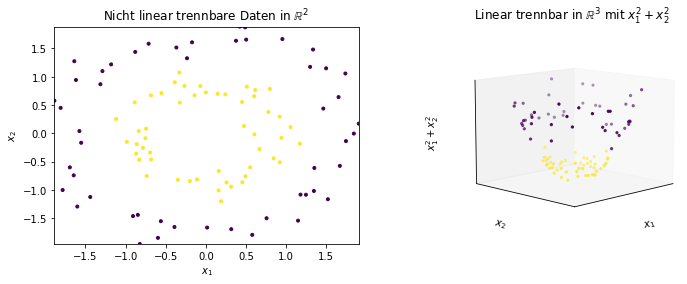

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D


X_circles, Y_circles = make_circles(noise=0.1, factor=0.5, random_state=1)
X_circles = StandardScaler().fit_transform(X_circles)

Z_circles = X_circles[:,0]*X_circles[:,0]+X_circles[:,1]*X_circles[:,1]

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_circles[:,0], X_circles[:,1],c=Y_circles, marker='.')
ax.set_xlim(X_circles[:,0].min(), X_circles[:,0].max())
ax.set_ylim(X_circles[:,1].min(), X_circles[:,1].max())
ax.set_title('Nicht linear trennbare Daten in $\mathbb{R}^2$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.zaxis.set_rotate_label(False)
ax.scatter(X_circles[:,0], X_circles[:,1], Z_circles, c=Y_circles, marker='.')
ax.set_title('Linear trennbar in $\mathbb{R}^3$ mit $x_1^2+x_2^2$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_1^2+x_2^2$', rotation=90)
ax.set_xticks(())
ax.set_yticks(())
ax.set_zticks(())
ax.view_init(10, 45)
plt.show()

Auf der linken Seite sehen wir zwei ineinander liegende Kreise, die unterschiedlich klassifiziert sind. Offensichtlich gibt es keine Gerade, mit der man diese Instanzen trennen kann, und man kann diese Daten folglich auch nicht mit einer linearen SVM sinnvoll klassifizieren. Auf der rechten Seite sehen wir die Erweiterung des Merkmalsraums durch das Merkmal $(x_1^2+x_2^2)$. Durch diese dritte Dimension erkennen wir, dass die gelben Instanzen im unteren Bereich liegen und die lila Instanzen im oberen Bereich. Mit einer Ebene, also der dreidimensionalen Erweiterung einer Geraden, können wir die Daten jetzt linear trennen. In den ursprünglichen zwei Dimensionen würde diese Trennung aber zu einer kreisförmigen Decision Boundary führen. Dies ist genau wie bei einer Tasse: Von oben betrachtet ist die Form auch nur ein Kreis.

In der Praxis definiert man bei SVMs nicht händisch weitere Merkmale, um den Raum zu erweitern, sondern benutzt stattdessen *Kernfunktionen* (engl. *kernel functions*). Die Kernfunktionen definieren, wie die Merkmale in den höherdimensionalen Raum transformiert werden. Das obige Beispiel benutzt einen *polynmiellen* Kern, da wir die Merkmale durch eine quadratische Funktion transformieren. Während wir uns das noch relativ einfach visualisieren können, ist das nicht bei allen Kernfunktionen ohne Weiteres möglich. Die *radiale Basisfunktion* (RBF) misst zum Beispiel die paarweisen radialen Distanzen zwischen den Instanzen und führt zu einem unendlichdimensionalen Merkmalsraum. Dies kann man weder visualisieren noch einfach berechnen. Im Allgemeinen kann man also die Kerntransformation nicht visuell darstellen und zum Teil nicht einmal den Raum vollständig berechnen. Die SVMs nutzen den *Kernel-Trick* (den wir hier nicht im Detail diskutieren), um zu vermeiden, dass die Daten überhaupt transformiert werden müssen.

Die Form der Decision Boundary im ursprünglichen Merkmalsraum hängt von der Kernfunktion ab, die man für die Feature Expansion nutzt. Im Folgenden sehen wir die Decision Surfaces der Irisdaten mit einer linearen SVM (keine Transformation der Merkmale), einer polynomiellen SVM und einer SVM mit einem RBF-Kernel.

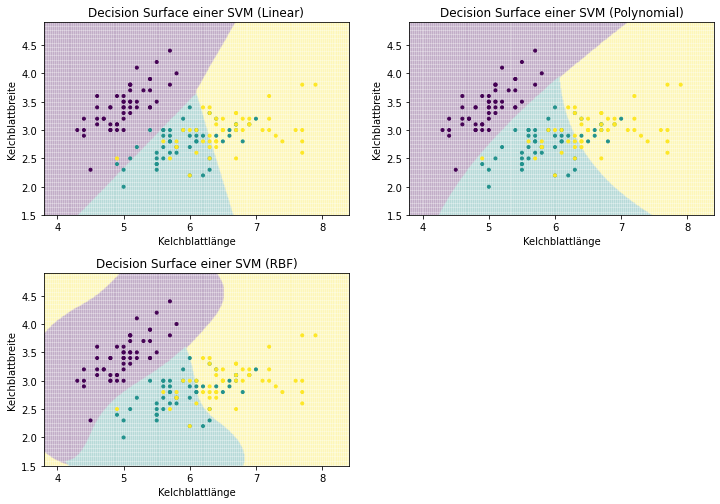

In [16]:
f, axes = plt.subplots(2, 2, figsize=(12, 7))
plot_decision_surface(SVC(kernel="linear", C=0.025), X, Y, title="Decision Surface einer SVM (Linear)", ax=axes[0,0])
plot_decision_surface(SVC(kernel='poly', degree=3, C=1), X, Y, title="Decision Surface einer SVM (Polynomial)", ax=axes[0,1])
plot_decision_surface(SVC(kernel='rbf', gamma=2, C=1), X, Y, title="Decision Surface einer SVM (RBF)", ax=axes[1,0])
axes[1,1].axis('off')
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

> **Bemerkung:**
>
> Die Kernfunktionen der SVMs haben häufig noch Parameter, mit denen diese skaliert werden. Für den praktischen Einsatz von SVMs sind die Parameter extrem wichtig und sie haben einen großen Einfluss auf das Ergebnis der Klassifikation. SVMs können sehr mächtig sein, jedoch nur wenn eine geeignete Kernfunktion mit passenden Parametern gewählt wird. 

## Neuronale Netzwerke

*Neuronale Netzwerke* basieren auf der Idee, die Kommunikation zwischen Neuronen im menschlichen Hirn zu simulieren, um Entscheidungen zu treffen. Die Grundidee ist einfach: Neuronen werden *aktiviert* und sie *propagieren* den Wert ihrer Aktivierung an weitere Neuronen. Diese Neuronen bestimmen dann wiederum den Wert ihrer Aktivierung und propagieren diesen weiter. 

Hier ist ein Beispiel für ein einfaches neuronales Netzwerk. 

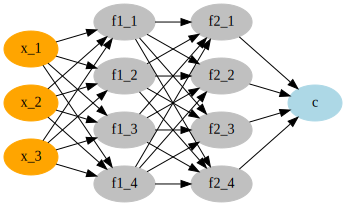

In [17]:
from graphviz import Digraph

network = Digraph()
network.attr(splines='line')
network.attr(rankdir='LR')

# Add three input neurons
with network.subgraph() as layer:
    layer.attr(rank='same')
    for i in range(1,4):
        layer.node('x_%i' % i, style='filled', color='orange')
    
# Add two hidden layers with 4 neurons
with network.subgraph() as layer:
    layer.attr(rank='same')
    for i in range(1,5):
        layer.node('f1_%i' % i, style='filled', color='silver')
with network.subgraph() as layer:
    layer.attr(rank='same')
    for i in range(1,5):
        layer.node('f2_%i' % i, style='filled', color='silver')

# Add one output neuron
with network.subgraph() as layer:
    layer.attr(rank='same')
    layer.node('c', style='filled', color='lightblue')
    
# Fully connected network between layers
for i in range(1,4):
    for j in range(1,5):
        network.edge('x_%i' % i, 'f1_%i' % j)
for i in range(1,5):
    for j in range(1,5):
        network.edge('f1_%i' % i, 'f2_%i' % j)
    network.edge('f2_%i' % i, 'c')
    
# Ensure correct order of nodes through invisible edges
for i in range(1,3):
    network.edge('x_%i' % i, 'x_%i' % (i+1), style='invis')
for i in range(1,4):
    network.edge('f1_%i' % i, 'f1_%i' % (i+1), style='invis')
    network.edge('f2_%i' % i, 'f2_%i' % (i+1), style='invis')

network.format = 'png'
# Visualize the graph
display(network)

Jeder Knoten im Graph repräsentiert ein Neuron. Die Neuronen selbst sind in *Ebenen* (engl. *layer*) organisiert. Man unterscheidet zwischen dem *Input Layer* (orange), den *Hidden Layers* (grau) und dem *Output Layer* (blau). Der Input Layer hat ein Neuron für jedes Merkmal. Mit anderen Worten, jedes Neuron des Input Layer propagiert den Wert des Merkmals einer Instanz in das Netzwerk. In unserem Beispiel gibt es also drei Merkmale $x_1$, $x_2$ und $x_3$. Der Output Layer gibt das Ergebnis des neuronalen Netzes aus, in unserem Fall die Klasse $c$. Häufig ist es so, dass es für jede Klasse ein Neuron im Output Layer gibt und man die Werte des Output Layer als Scoring-Funktion interpretiert. Die Hidden Layers beinhalten zusätzliche Neuronen und korrelieren die Informationen aus dem Input Layer, um eine geeignete Aktivierung der Neuronen im Output Layer zu lernen. Diese Layers sind sozusagen *versteckt*, da man von außen nur den Input bzw. Output Layer sieht. Die Kanten zwischen den Neuronen modellieren den Informationsfluss: Die Aktivierung eines Neurons wird an alle mit einer Kante verbundenen Neuronen weitergeleitet und dort in die Berechnung der Aktivierung einbezogen. In unserem Beispielnetzwerk gibt es Kanten zu allen Neuronen der nächsten Ebene. Diese Art der Verbindung zwischen den Ebenen bezeichnet man als *Fully Connected Layer* und man nennt ein Netzwerk, das nur aus Fully Connected Layers besteht, *Multilayer Perceptron* (MLP). Jedes Neuron nutzt die gewichtete Summe der Eingaben, um die *Aktivierungsfunktion* zu berechnen. Die Aktivierung des Neurons $f_{1, 3}$ wird zum Beispiel berechnet als

$$f_{1,3} = f_{act}(\sum_{i=1}^3 w_i x_i),$$

wobei $f_{act}$ die Aktivierungsfunktion des Neurons und $w_i$ die Gewichte der Eingabe sind. Die Aktivierungsfunktion transformiert also die Eingabe des Neurons. Es gibt verschiedene Aktivierungsfunktionen, die üblicherweise verwendet werden und unterschiedliche Auswirkungen haben.  Vier häufig verwendete Funktionen sind die Identität, $RelU$, $Logistic$ und $tanh$. 

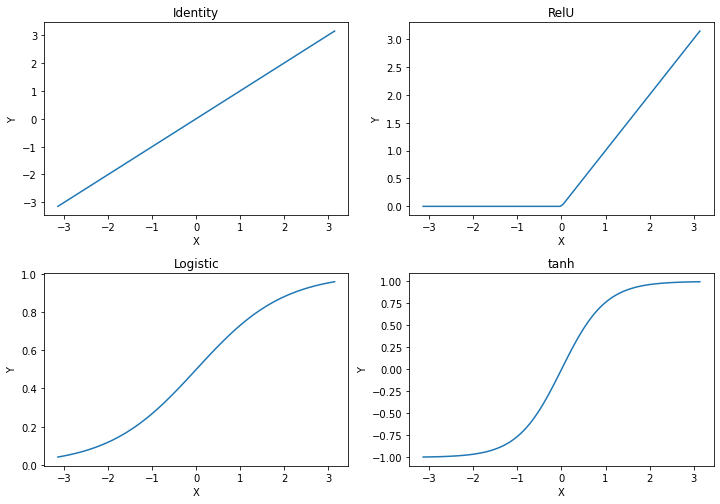

In [39]:
f, axes = plt.subplots(2, 2, figsize=(12, 7))
axes[0, 0].plot(np.linspace(-np.pi, np.pi, 100),
                np.linspace(-np.pi, np.pi, 100))
axes[0, 0].set_title("Identity")
axes[0, 0].set_xlabel("X")
axes[0, 0].set_ylabel("Y")
axes[0, 1].plot(np.linspace(-np.pi, np.pi, 100),
                np.maximum(0, np.linspace(-np.pi, np.pi, 100)))
axes[0, 1].set_title("RelU")
axes[0, 1].set_xlabel("X")
axes[0, 1].set_ylabel("Y")
axes[1, 0].plot(np.linspace(-np.pi, np.pi, 100), 1 /
                (1+np.exp(-np.linspace(-np.pi, np.pi, 100))))
axes[1, 0].set_title("Logistic")
axes[1, 0].set_xlabel("X")
axes[1, 0].set_ylabel("Y")
axes[1, 1].plot(np.linspace(-np.pi, np.pi, 100),
                np.tanh(np.linspace(-np.pi, np.pi, 100)))
axes[1, 1].set_title("tanh")
axes[1, 1].set_xlabel("X")
axes[1, 1].set_ylabel("Y")
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=None, hspace=0.3)
plt.show()

Die einfachste Aktivierungsfunktion ist die *Identität*, bei der die gewichtete Eingabe der Aktivierung des Neurons entspricht. Die *Rectified Linear Unit*, kurz *RelU*, ist eine Variante der Identität, die alle negativen Werte auf null setzt, es gibt also keine negative Aktivierung. In der Praxis hat sich diese Funktion bewährt und ist für viele Anwendungen die erste Wahl. Die logistische Funktion und $tanh$ Funktionen haben beide eine "S-Form". Die logistische Funktion kennen wir bereits von der logistischen Regression. Sie bildet die Eingabe auf eine Wahrscheinlichkeitsverteilung ab. Ist die Eingabe negativ, ist die Wahrscheinlichkeit kleiner als 0,5, ist die Eingabe positiv, ist die Wahrscheinlichkeit größer als 0,5. Bei ca. $\pm3$ konvergiert die Funktion zu null bzw. eins. Die $tanh$-Funktion ist im Intervall $[-1, 1]$ nahezu linear. Außerhalb dieses Bereichs konvergiert diese Funktion schnell gegen -1 bzw. +1. Mit der Ausnahme der Identität "normalisieren" die Aktivierungsfunktionen also die Eingaben, um extreme Werte zu verhindern.

Wenn wir ein neuronales Netz einsetzen wollen, müssen wir die komplette Struktur des Netzwerks definieren: Wie viele Hidden Layers gibt es, wie viele Neuronen hat jeder Layer, wie sind die Neuronen miteinander verbunden, um die Informationen zu propagieren, und welche Aktivierungsfunktionen werden benutzt. Das Training vom neuronalen Netz berechnet die Gewichte $w_i$, also den Einfluss von jedem Neuron auf die Aktivierung der folgenden Neuronen. Unten sieht man, wie sich diese Entscheidungen auf die Decision Surfaces für die Irisdaten auswirken.

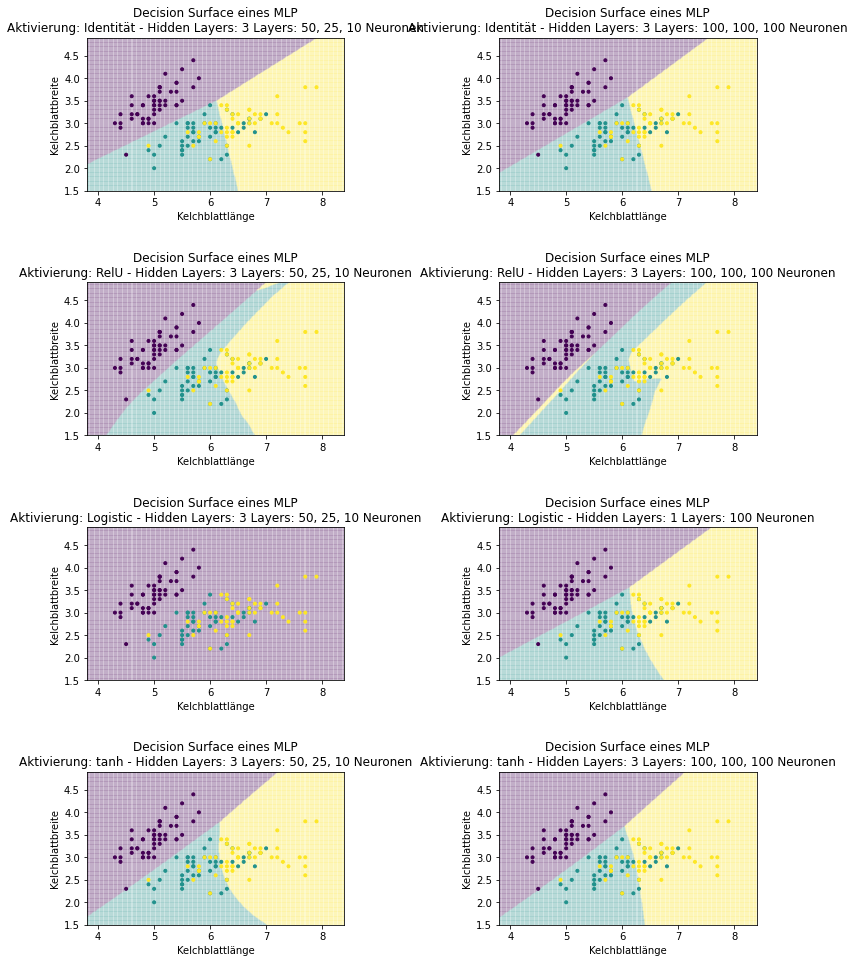

In [18]:
from sklearn.neural_network import MLPClassifier

f, axes = plt.subplots(4, 2, figsize=(12, 14))
plot_decision_surface(MLPClassifier(hidden_layer_sizes=(50, 25, 10), max_iter=10000,
                                    activation='identity'), X, Y, title="Decision Surface eines MLP\nAktivierung: Identität - Hidden Layers: 3 Layers: 50, 25, 10 Neuronen", ax=axes[0, 0])
plot_decision_surface(MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000,
                                    activation='identity'), X, Y, title="Decision Surface eines MLP\nAktivierung: Identität - Hidden Layers: 3 Layers: 100, 100, 100 Neuronen", ax=axes[0, 1])
plot_decision_surface(MLPClassifier(hidden_layer_sizes=(50, 25, 10), max_iter=10000,
                                    activation='relu'), X, Y, title="Decision Surface eines MLP\nAktivierung: RelU - Hidden Layers: 3 Layers: 50, 25, 10 Neuronen", ax=axes[1, 0])
plot_decision_surface(MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000,
                                    activation='relu'), X, Y, title="Decision Surface eines MLP\nAktivierung: RelU - Hidden Layers: 3 Layers: 100, 100, 100 Neuronen", ax=axes[1, 1])
plot_decision_surface(MLPClassifier(hidden_layer_sizes=(50, 25, 10), max_iter=10000,
                                    activation='logistic'), X, Y, title="Decision Surface eines MLP\nAktivierung: Logistic - Hidden Layers: 3 Layers: 50, 25, 10 Neuronen", ax=axes[2, 0])
plot_decision_surface(MLPClassifier(hidden_layer_sizes=(100, ), max_iter=10000,
                                    activation='logistic'), X, Y, title="Decision Surface eines MLP\nAktivierung: Logistic - Hidden Layers: 1 Layers: 100 Neuronen", ax=axes[2, 1])
plot_decision_surface(MLPClassifier(hidden_layer_sizes=(50, 25, 10), max_iter=10000,
                                    activation='tanh'), X, Y, title="Decision Surface eines MLP\nAktivierung: tanh - Hidden Layers: 3 Layers: 50, 25, 10 Neuronen", ax=axes[3, 0])
plot_decision_surface(MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000,
                                    activation='tanh'), X, Y, title="Decision Surface eines MLP\nAktivierung: tanh - Hidden Layers: 3 Layers: 100, 100, 100 Neuronen", ax=axes[3, 1])
plt.subplots_adjust(left=None, bottom=0, right=None,
                    top=None, wspace=0.6, hspace=0.6)
plt.show()

Wie man sieht, sind alle Decision Surfaces verschieden. Mit der Identität erhält man meine eine lineare Decision Boundary, bei der logistischen Funktion und $tanh$ haben wir eine glatt aussehende (differenzierbare) Kurve, bei $RelU$ kann man die Form bestenfalls als unregelmäßig beschreiben. Bei RelU sehen wir auch das große Risiko von neuronalen Netzen: Overfitting. Bei drei Fully Connected Layers mit je 100 Neuronen pro Layer haben wir $2*(100*100)=20000$ Gewichte zwischen den Hidden Layers, die berechnet werden. Dazu kommen noch die Gewichte zwischen den Hidden Layers und dem Input bzw. Output Layer. Wir haben also eine sehr große Anzahl von Modellparametern, sodass es problemlos möglich ist, eine kleine Unregelmäßigkeit in die Decision Boundary einzubauen, um etwa eine einzelne gelbe Instanz zwischen lila und türkis durch Overfitting richtig zu klassifizieren. Das ist ein allgemeines Problem von neuronalen Netzen. Sind sie zu klein, bekommt man keine guten Ergebnisse, sind sie zu groß, riskiert man Overfitting. Die Wahl der Netzwerkstruktur benötigt daher viel Erfahrung und sollte mithilfe von Validierungsdaten und Visualisierungen unterstützt werden.

Dies war nur ein grober Überblick über neuronale Netze. Für den Einsatz in der Praxis ist es oft ratsam, auf etablierte Netzstrukturen zurückzugreifen. Deshalb wollen wir noch kurz auf einige wichtige Netzwerkstrukturen eingehen. Dieser Überblick ist nicht vollständig, da sich das Feld sehr schnell entwickelt und es immer neue Trends gibt.

- *Convolutional Neural Networks* (CNN) / *Convolutional Layers*: Hier wird eine räumliche Beziehung zwischen den Merkmalen ausgenutzt. Hat man zum Beispiel ein Bild als Eingabe, gibt es Nachbarschaftsbeziehungen zwischen den Pixeln. Statt also alle Pixel miteinander zu verbinden, wie es bei einem Fully Connected Layer der Fall wäre, verbindet man nur die Nachbarn miteinander. Weiterhin kann man hierbei verschiedene Eingabekanäle nutzen, zum Beispiel für die verschiedenen Farben (RBG). Auch dies kann man als Nachbarschaft betrachten. Hierdurch kann das Netzwerk die lokale Struktur innerhalb von Bildern ausnutzen. Technisch wird das durch *Filter*, die auswählen, welche Pixel aus der Nachbarschaft zusammenhängen, und *Pooling Layers*, die dann die Informationen aus der Nachbarschaft verbinden, umgesetzt.
- *Dropout Layers*: Neuronale Netze mit vielen Neuronen neigen zum Overfitting. Durch Dropout Layers kann man während des Trainings zufällig einige Bereiche des Netzwerks deaktivieren. Hierdurch soll erreicht werden, dass kein Bereich einfach Informationen auswendig lernen kann, die dann verloren gehen. Stattdessen soll dies dazu führen, dass das Netzwerk ein generalisiertes Konzept lernt, was ohne den deaktivierten Bereich zwar nicht mehr perfekt wäre, aber auch kein Totalausfall.
- *Softmax Layers*: Softmax Layers werden häufig zur Berechnung des Output Layer verwendet. Die Idee des Softmax Layer ist es, dass der Output Layer dann als Ergebnis eine Wahrscheinlichkeitsverteilung als Scoring-Funktion darstellt. Hierzu wird die Softmax-Funktion verwendet, die man als Verallgemeinerung der logistischen Regression interpretieren kann.
- *Recurrent Neural Network* (RNN): Im obigen Beispiel gehen alle Kanten des Netzwerkes immer zum nächsten Layer, was auch als *feed forward* bezeichnet wird. Es ist jedoch auch möglich, dass es Kanten innerhalb eines Layer oder sogar zu vorigen Layers gibt. Solche Netzwerke nennt man *recurrent*, da sie Informationen auch zurückreichen können. Hierdurch haben diese Netzwerke eine Art "Gedächtnis", das man nutzen kann, um zeitliche Abhängigkeiten zwischen Merkmalen zu modellieren. Durch dieses Gedächtnis gibt es jedoch auch einige Probleme, sodass häufig spezielle Neuronen verwendet werden, zum Beispiel für *Long Short-Term Memory* (LSTM).
- *Transformer*: Transformer versuchen, das Konzept der *Aufmerksamkeit* in den Netzwerkstrukturen abzubilden, um zum Beispiel bei der Textanalyse nicht nur das aktuelle Wort oder den aktuellen Satz zu betrachten, sondern den größeren Kontext. Hierzu gibt es einen *Attention Head*, der den aktuellen Kontext kennt und modelliert, wie sich dieser Kontext auswirkt.
- *Generative Adversarial Network* (GAN): Man kann mit neuronalen Netzen auch künstliche Instanzen generieren. Hierbei treten zwei neuronale Netze gegeneinander an: Das erste Netz versucht zu entscheiden, ob eine Instanz aus den echten Trainingsdaten kommt oder künstlich erzeugt wurde. Das zweite Netz versucht künstliche Daten so zu erzeugen, dass das erste Netz diese für echt hält. Hierdurch kann man sowohl die Qualität des ersten Netzes verbessern als auch künstliche Daten, die wie echt aussehen, generieren, zum Beispiel Bilder.
- *Deep Neural Network* (DNN): Formal ist jedes neuronale Netz, das mindestens einen Hidden Layer hat, ein DNN. Hiermit sind jedoch in der Regel sehr große Netzwerke gemeint, die oft viele Ebenen und extrem viele Neuronen besitzen, teils mehrere Millionen oder sogar Milliarden.

### Exkurs: CNNs zum Erkennen von Zahlen

Als kurzen Einstieg betrachten wir das Hello World des Deep Learning: Die Erkennung von Zahlen mit dem sogenannten MNIST-Datensatz. Dieser Datensatz besteht aus einfachen Schwarz-Weiß-Bildern der Ziffern 0 bis 9. Die ersten zehn Ziffern sehen zum Beispiel folgendermaßen aus.

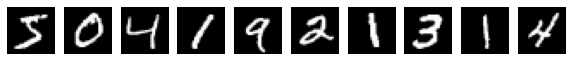

In [20]:
# we need three libraries (and matplotlib):
# tensorflow is one of the major libraries for deep learning
# keras is the standard library to define network for tensorflow
# both are compatible with numpy for numerics
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# we first load the data from the keras samples
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# rescale features to the interval [0,1]
min_val = np.min(x_train)
max_val = np.max(x_train)
x_train = (x_train-min_val)/(max_val-min_val)
x_test = (x_test-min_val)/(max_val-min_val)

# we need to add an "empty dimension", because we need a tensor (3d matrix)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert labels into a categorical feature
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# show the first ten instances of the data
fig, axes = plt.subplots(1, 10, figsize=(10,3))
for i in range(10):
    axes[i].imshow(x_train[i], cmap = 'gray')
    axes[i].axis('off')
plt.show()

Dieser Datensatz ist gut geeignet, um zu zeigen, wie einige der oben genannten Netzwerkstrukturen funktionieren, um ein CNN zu erstellen. Die Bilder der Zahlen haben 26x26  Pixel und bestehen aus den Graustufen mit Werten von 0 bis 255. Zur Verarbeitung der Bilder eignet sich zum Beispiel folgendes Netzwerk:
*
- Die Eingaben werden zuerst von einem *Convolutional Layer* mit einem 3x3-Kernel verarbeitet. Das bedeutet, dass jeweils 9 Pixel gemeinsam betrachtet werden, nämlich die drei benachbarten Pixel in der Höhe und Breite. Das geschieht, indem ein *Filter* gelernt wird, den wir uns einfach als Linearkombination der neun Pixel vorstellen können. Für jeden Pixel wird dieser Filter berechnet, wir haben also als Ein- und Ausgabe die 26x26 Pixel. Das passiert jedoch nicht nur einmal, sondern in unserem Fall 32-mal, damit das Netzwerk mehrere Filter pro Pixel lernen kann. Entsprechend haben wir also 26x26x32 Werte für die Ausgabe.
- Anschließend wird die Dimension der Daten durch einen *Pooling Layer* reduziert. Hier werden Quadrate von 2x2 Pixel zusammengefasst. Es gibt verschiedene Varianten vom Pooling. Beim *Max Pooling* wird das Maximum der vier Werte als neuer Wert genommen. Dadurch, dass jeweils vier benachbarte Pixel zusammengefasst werden, bekommen wir 13x13x32 Werte.
- Durch einen *Flatten Layer* wird diese dreidimensionale Matrixstruktur (man spricht von einem Tensor) in einen einfachen Vektor verwandelt. Dieser hat dann $13 \cdot 13 \cdot 32 = 5408$ Werte. In diesem Layer wird nichts berechnet, sondern nur die Form der Daten verändert.
- Jetzt haben wir einen *Dense Layer*, den wir auch schon unter dem Namen Fully Connected Layer beim MLP kennengelernt haben. In unserem Fall sind 128 Neuronen im Dense Layer, die alle die 5408 Werte aus dem Max Pooling als Eingabe erhalten.
- Als Nächstes kommt ein *Dropout Layer* mit einer Dropout-Wahrscheinlichkeit von 50%. Das heißt, dass jedes der 128 Neuronen aus dem Dense Layer in jedem Trainingsschritt mit einer Wahrscheinlichkeit von 50% deaktiviert wird. Das garantiert, dass jede Eingabe von verschiedenen Bereichen des Netzwerks berücksichtigt wird, und verhindert dadurch Overfitting.
- Als Ausgabe haben wir wieder einen Dense Layer, nur dass wir diesmal für jede Klasse ein Neuron haben. Als Aktivierungsfunktion wird die oben bereits erwähnte Softmax-Funktion genutzt, sodass wir als Ausgaben die Wahrscheinlichkeit für jede Zahl erhalten.

In [22]:
# we now build define the network structure
# each entry in the list defines a layer
# the first entry is the input layer
# the last entry is the output layer
# the other entries are the hidden layer
model = keras.Sequential(
    layers=[keras.Input(shape=x_train[0].shape), # 28x28 pixel, one input channel (b/w)
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax")],
    name='CNN'
)

model.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________

In der Zusammenfassung des Modells von Keras sieht man, dass dieses Netz bereits fast 700.000 Parameter hat, obwohl es für Deep Learning noch relativ klein ist. Daher braucht man auch sehr viele Daten, um solche Netze zu trainieren. Bei den MNIST-Daten gibt es 60.000 Trainingsbilder und 10.000 Testbilder. Wir nutzen 10% der Trainingsdaten als Validierungsdaten. Das sind insgesamt fast zu wenig Daten für ein Netzwerk dieser Größe, reicht aber als Beispiel. Im Training wird nach jeder *Epoche* die aktuelle Modellqualität auf den Trainingsdaten (accuracy) und den Validierungsdaten (val_accuracy) ausgegeben. Eine Epoche bedeutet, dass jede Trainingsinstanz zum Verbessern der Gewichte des neurona-len Netzwerks benutzt wurde.

In [24]:
batch_size = 128 # number of instances used for updated at once
epochs = 15      # number of times each instance is used

print('Training des neuronalen Netzwerks:')
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2)

score = model.evaluate(x_test, y_test, verbose=0, return_dict=True)
print()
print('Accuracy auf den Testdaten: %.3f' % score['accuracy'])

Training des neuronalen Netzwerks:
Epoch 1/15
422/422 - 4s - loss: 0.1345 - accuracy: 0.9598 - val_loss: 0.0607 - val_accuracy: 0.9815
Epoch 2/15
422/422 - 4s - loss: 0.0913 - accuracy: 0.9731 - val_loss: 0.0494 - val_accuracy: 0.9870
Epoch 3/15
422/422 - 4s - loss: 0.0750 - accuracy: 0.9776 - val_loss: 0.0441 - val_accuracy: 0.9878
Epoch 4/15
422/422 - 4s - loss: 0.0634 - accuracy: 0.9809 - val_loss: 0.0422 - val_accuracy: 0.9878
Epoch 5/15
422/422 - 4s - loss: 0.0548 - accuracy: 0.9824 - val_loss: 0.0429 - val_accuracy: 0.9890
Epoch 6/15
422/422 - 4s - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.0382 - val_accuracy: 0.9900
Epoch 7/15
422/422 - 4s - loss: 0.0450 - accuracy: 0.9851 - val_loss: 0.0401 - val_accuracy: 0.9893
Epoch 8/15
422/422 - 4s - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0418 - val_accuracy: 0.9882
Epoch 9/15
422/422 - 4s - loss: 0.0358 - accuracy: 0.9880 - val_loss: 0.0468 - val_accuracy: 0.9883
Epoch 10/15
422/422 - 4s - loss: 0.0310 - accuracy: 0.9904 - val_

Man erkennt, dass das Modell bereits nach der ersten Epoche sehr gut ist. Anschließend verbessert es sich noch weiter, sodass insgesamt fast 99% der Zahlen korrekt erkannt werden. Diese Art von neuronalem Netz ist sehr verbreitet für die Objekterkennung in beliebigen Bildern. Da es dann aber in der Regel mehr Pixel, mehr Farbkanäle, mehr Arten von Objekten und auch mehr Daten gibt, sind die CNNs größer und haben oft viele Convolutional, Pooling und Dropout Layers.

## Vergleich der Klassifikationsalgorithmen

Wir haben sieben verschiedene Ansätze zum Lernen von Hypothesen zur Klassifikation betrachtet. Jeder dieser Ansätze hat andere Stärken und Schwächen. Welcher Algorithmus die beste Wahl ist, hängt von den Umständen (Anwendungsfall, verfügbare Daten) ab. In diesem Abschnitt vergleichen wir die Algorithmen direkt miteinander. 

### Grundidee

Wir haben diese Algorithmen nicht nur wegen ihrer praktischen Relevanz diskutiert, sondern auch weil alle Algorithmen auf einer anderen Grundidee basieren:

- $k$-Nearest Neighbor ist ein *instanzbasiertes* Verfahren, das die Klassifikation durch den direkten Vergleich von Instanzen berechnet. 
- Entscheidungsbäume sind *regelbasiert* und ihre Erstellung beruht auf der Informationstheorie. 
- Random Forests sind ein *Ensemble*, was schwächere Hypothesen zu einer starken Hypothese kombiniert. 
- Logistische Regression *schätzt Wahrscheinlichkeiten* und zeigt, wie *Regression* zur Klassifikation verwendet werden kann.
- Naive Bayes ist aus der *Wahrscheinlichkeitsrechnung* abgeleitet. 
- SVMs nutzen das Konzept der *Margin* und der *Feature Expansion* durch *Kerntransformationen*.
- Neuronale Netze sind ein sehr generischer Ansatz, den man für verschiedene Anwendungsfälle anpassen kann. Unter der Haube handelt es sich um sehr komplexe Regressionsmodelle.

Trotz dieser Vielfalt gibt es noch weitere wichtige Algorithmen, die wir nicht betrachtet haben, zum Beispiel Ensemble-Algorithmen, die auf *Boosting* setzen, um bessere Ergebnisse in Bereichen der Daten zu erhalten, wo die Güte bisher schlecht ist. Trotzdem hat man mit diesen Algorithmen eine gute und vielfältige Werkzeugkiste zum Lösen von Klassifikationsproblemen. 

### Decision Surfaces

Wesentlich für die Güte der gelernten Hypothesen sind die Decision Surfaces. Daher betrachten wir diese jetzt für verschiedene Beispieldatensätze und fangen mit den Irisdaten an.

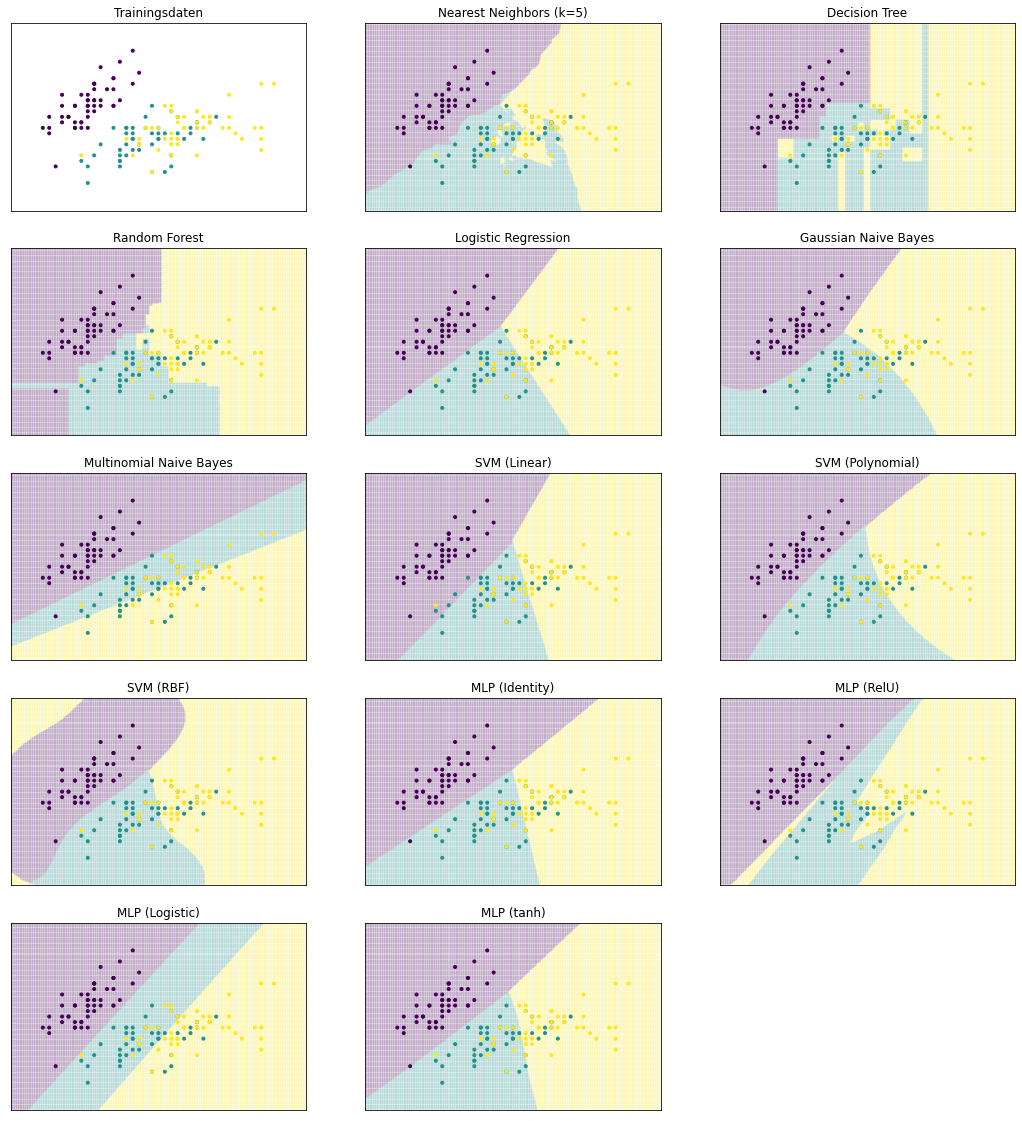

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression

def plot_clf_comparison(X, Y):
    classifiers = [KNeighborsClassifier(5),
                   DecisionTreeClassifier(),
                   RandomForestClassifier(n_estimators=100, max_depth=3),
                   LogisticRegression(),
                   GaussianNB(),
                   MultinomialNB(),
                   SVC(kernel="linear", C=0.025, probability=True),
                   SVC(kernel='poly', degree=3, C=1, probability=True),
                   SVC(kernel='rbf', gamma=2, C=1, probability=True),
                   MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                                 max_iter=10000, activation='identity'),
                   MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                                 max_iter=10000, activation='relu'),
                   MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                                 max_iter=10000, activation='logistic'),
                   MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, activation='tanh')]

    clf_names = ["Nearest Neighbors (k=5)",
                 "Decision Tree",
                 "Random Forest",
                 "Logistic Regression",
                 "Gaussian Naive Bayes",
                 "Multinomial Naive Bayes",
                 "SVM (Linear)",
                 "SVM (Polynomial)",
                 "SVM (RBF)",
                 "MLP (Identity)",
                 "MLP (RelU)",
                 "MLP (Logistic)",
                 "MLP (tanh)"]
    f, axes = plt.subplots(5, 3, figsize=(18, 20))
    axes[0, 0].set_xlim(X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5)
    axes[0, 0].set_ylim(X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5)
    axes[0, 0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, marker='.')
    axes[0, 0].set_title('Trainingsdaten')

    cnt = 1
    for clf, name in zip(classifiers, clf_names):
        i = int(cnt/3)
        j = cnt % 3
        plot_decision_surface(clf, X, Y, title=name, ax=axes[i, j])
        cnt += 1
    while cnt < 15:
        i = int(cnt/3)
        j = cnt % 3
        axes[i, j].axis('off')
        cnt += 1
    plt.setp(plt.gcf().get_axes(), xticks=[],
             yticks=[], ylabel=None, xlabel=None)


plot_clf_comparison(X, Y)
plt.show()

Alle Algorithmen können gut die lila Instanzen von den anderen trennen. Es gibt jedoch größere Unterschiede bei der Trennung von türkisen und gelben Instanzen. Beim $k$-Nearest-Neighbor-Algorithmus und beim Entscheidungsbaum gibt es einzelne türkise Inseln innerhalb der gelben Region, die auf Overfitting hindeuten. Dies liegt an dem instanzbasierten Verfahren bzw. an den Regeln, die einfach nicht zusammenhängende Regionen erzeugen können. Dies wäre auch mit dem Random Forest möglich, wird hier aber durch die flachen Entscheidungsbäume mit einer niedrigen Tiefe von drei vermieden. Die Decision Boundaries der anderen Algorithmen werden durch kontinuierliche Funktionen beschrieben. Daher gibt es - außer bei RelU - keine derartigen Inseln. Bei neuronalen Netzen können die Funktionen leicht so komplex werden, dass man derartiges Overfitting nicht ausschließen kann. Lediglich beim Multinomial Naive Bayes ist das Ergebnis relativ schlecht, was sich aber dadurch begründen lässt, dass die Daten numerisch und nicht kategorisch sind.

Ein interessanter Aspekt, den man beobachten kann, ist folgender: Während die Decision Surfaces in den Regionen, wo die Trainingsdaten liegen, relativ ähnlich sind, gibt es größere Unterschiede in den Bereichen, wo es keine Daten gibt. Dies liegt an der Natur des maschinellen Lernens: Dort, wo keine Daten im Training vorliegen, gibt es keine Garantie, dass das Ergebnis sinnvoll ist und auf diese Bereiche generalisiert. Klassifikationsmodelle sind daher nur dort zuverlässig, wo es Daten im Training gab. Deshalb ist es auch wichtig, dass die Daten im produktiven Einsatz die gleiche Verteilung wie die Trainingsdaten haben.

Der nächste Datensatz sind zwei Halbmonde, die sehr nah beieinander  liegen, aber sich (beinahe) nicht überlappen. 

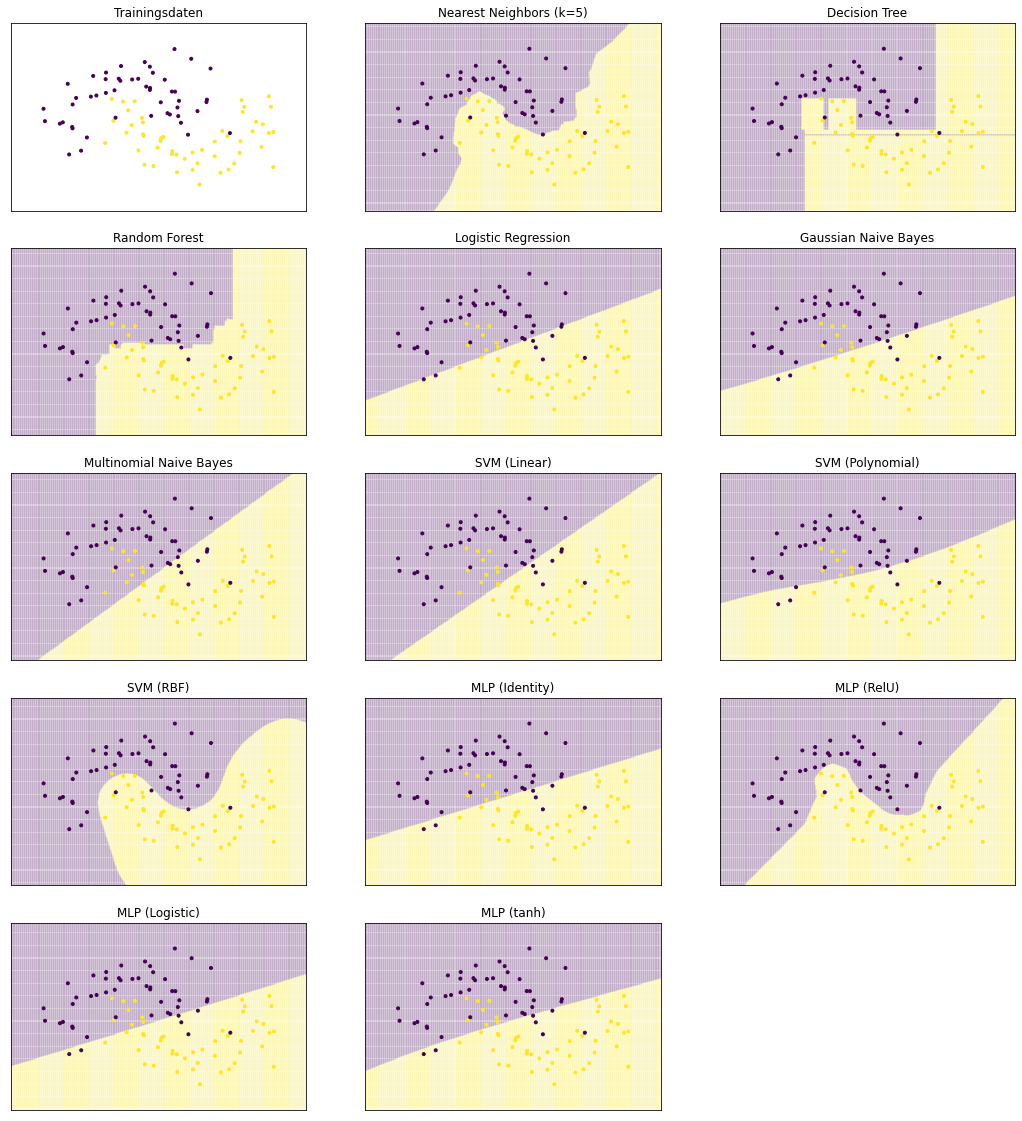

In [52]:
from sklearn.datasets import make_moons

X_moons, Y_moons = make_moons(noise=0.3, random_state=0)
plot_clf_comparison(pd.DataFrame(X_moons+3),Y_moons)
plt.show()

Bei diesen Daten können wir schon klare Unterschiede in der Ausdrucksfähigkeit der von den Algorithmen berechneten Hypothesen beobachten. Logistische Regression, Naive Bayes, die lineare und polynomielle SVM sowie alle MLPs, die nicht RelU als Aktivierungsfunktion haben, berechnen eine lineare oder nahezu lineare Trennung der Daten. Dies führt zu Fehlklassifikationen, da die Halbmonde ineinander liegen. Diese Ergebnisse sind zwar nicht extrem schlecht, da immer noch die meisten Daten richtig klassifiziert werden, die Decision Boundaries spiegeln jedoch nicht die eigentliche Verteilung der Klassen wider. Die anderen Algorithmen schaffen es besser, zwischen den Klassen zu unterscheiden, und lernen die Form der Halbmonde als Decision Boundary. Lediglich bei den Entscheidungsbäumen sieht man wieder einige Anzeichen für Overfitting.

Der nächste Datensatz sind zwei ineinander liegende Kreise. Auch hier liegen die Instanzen wieder nah beieinander, aber es gibt kaum Überschneidungen. 

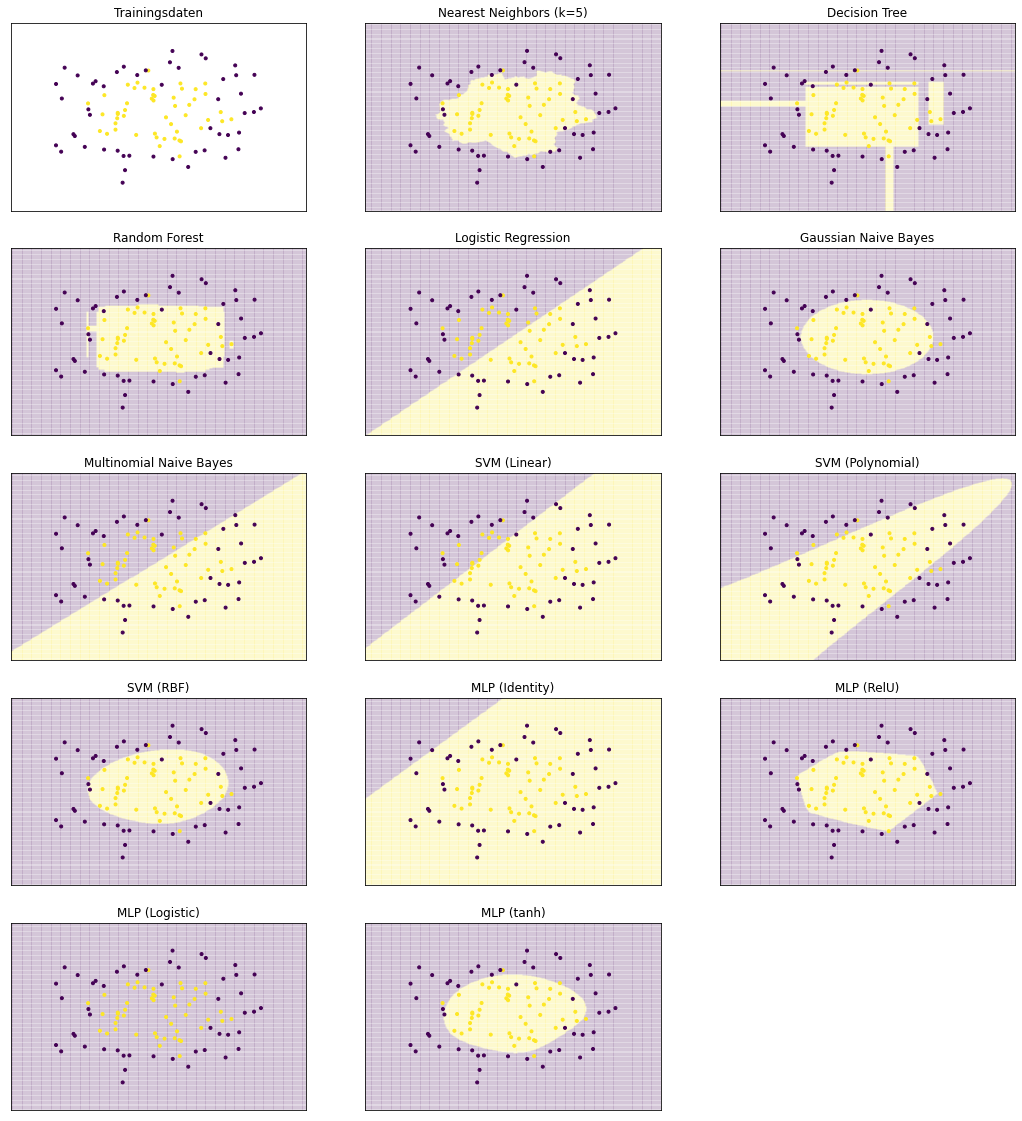

In [53]:
from sklearn.datasets import make_circles

X_circles, Y_circles = make_circles(noise=0.2, factor=0.5, random_state=1)
plot_clf_comparison(pd.DataFrame(X_circles+3), Y_circles)
plt.show()

Das Ergebnis bei den Kreisen ist ähnlich wie bei den Halbmonden: Die Algorithmen, die bei den Halbmonden gute Ergebnisse geliefert haben, funktionieren auch bei den Kreisen. Einige Algorithmen, die mit den Halbmonden Probleme hatten, können die Kreise gut erkennen, zum Beispiel Gaussian Naive Bayes und das MLP mit $tanh$ als Aktivierungsfunktion. Dies liegt daran, dass bei den Halbmonden eine etwa lineare Trennung bereits ein halbwegs gutes Ergebnis liefert. Hierdurch gab es keinen großen Druck auf die Algorithmen, nach einer komplexeren Decision Boundary zu suchen. Dies ist bei den Kreisen nicht der Fall: Hier funktioniert nur eine runde Decision Boundary, alle anderen Formen liefern schlechte Ergebnisse. Dies übt einen starken Druck auf die intern benutzten Optimierungsverfahren aus, sodass sie sich besser anpassen und eine komplexere Decision Boundary finden.

Als Letztes betrachten wir noch zwei durch eine große Lücke getrennte Klassen.

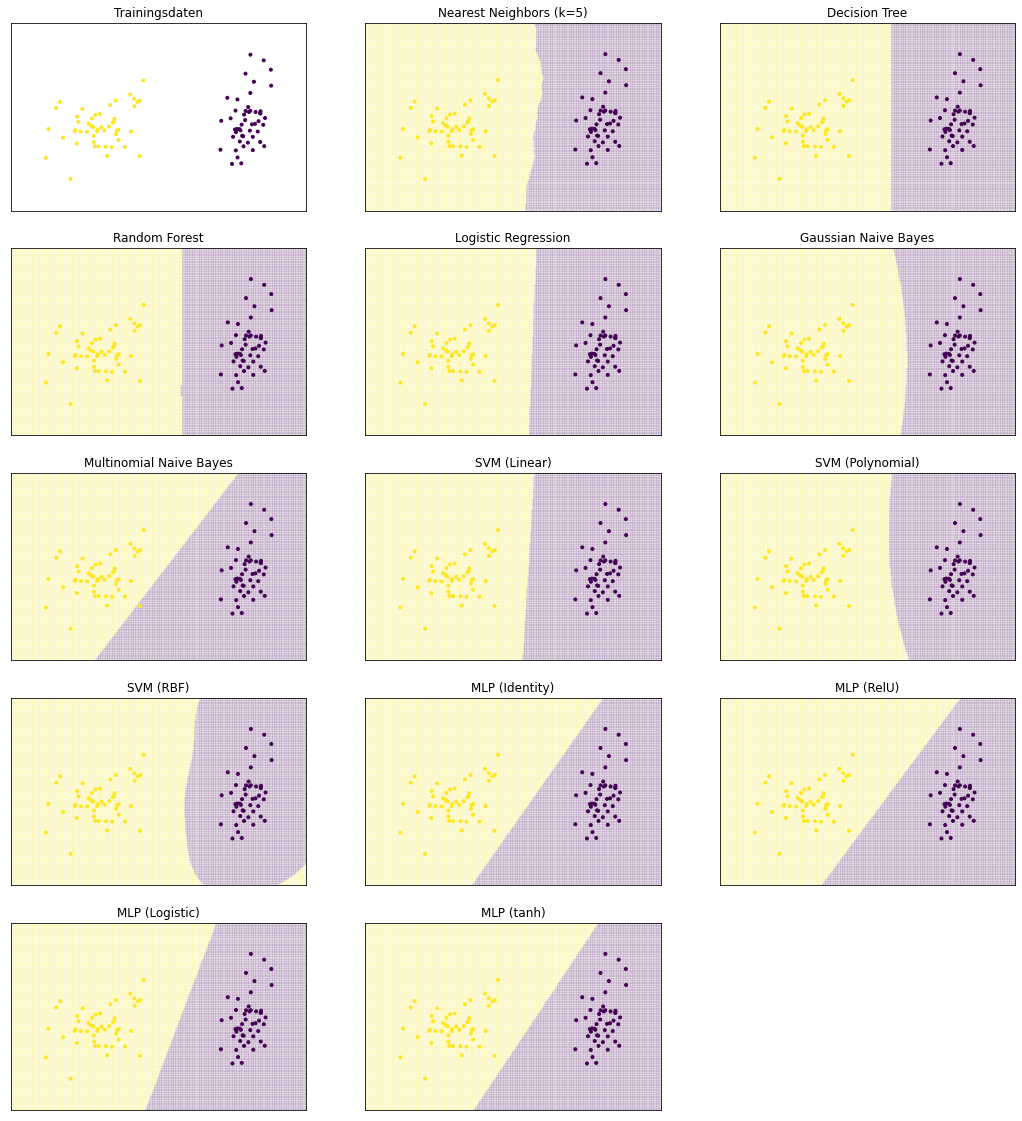

In [54]:
from sklearn.datasets import make_classification

X_linear, Y_linear = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
plot_clf_comparison(pd.DataFrame(X_linear+3), Y_linear)
plt.show()

Wie zu erwarten war, können alle Algorithmen diese Daten problemlos korrekt klassifizieren. Wir sehen jedoch große Unterschiede in den Margins, die wir bereits von der SVM kennen. Die meisten Algorithmen berechnen die Decision Boundary so, dass die Margin zwar in der Regel nicht optimal, aber zumindest relativ groß ist. Hier sieht man, dass dies insbesondere bei der SVM der Fall ist, bei den Entscheidungsbäumen und Random Forests wird bei der Partitionierung ebenfalls auf die Margins geachtet. Beim $k$-Nearest-Neighbor-Algorithmus folgt die große Margin direkt aus der Nachbarschaftsbeziehung zwischen den Instanzen. Insbesondere bei Naive Bayes und den MLPs sieht man, dass hier die Margin bei der Berechnung der Ergebnisse nicht berücksichtigt wird. Hierdurch können diese Algorithmen die Daten zwar gut trennen, haben aber ein Risiko, dass es zu Fehlklassifikationen kommt. Bei den MLPs gibt es hierfür eine einfache Erklärung: Das interne Optimierungskriterium ist in der Regel die Accuracy auf den Trainingsdaten, und diese ist unabhängig von der Wahl der Margin. Daher endet die Berechnung der Lösung für die neuronalen Netze, sobald eine Lösung gefunden wird, egal wie groß die Margin ist. Dies kann man durch Validierungsdaten umgehen.

### Ausführungszeit

Die Ausführungszeit kann ein wichtiger Faktor sein, insbesondere wenn das Training oder die Vorhersage strikte Zeitvorgaben einhalten muss oder es große Menge von Daten gibt. Wir vergleichen die Ausführungszeiten für die Halbmonddaten für 1.000, 10.000, 100.000 und 1.000.000 Instanzen. Die Zeiten wurden mit einem normalen Laptop (Intel Core i7-8850 @ 2.60GHz, 32 GB RAM) mit scikit-learn 0.24 gemessen.

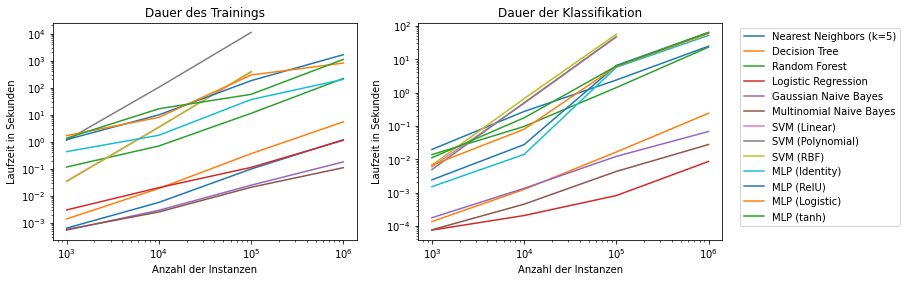

In [55]:
from sklearn.datasets import make_moons
import timeit

classifiers = [KNeighborsClassifier(5),
               DecisionTreeClassifier(),
               RandomForestClassifier(n_estimators=100),
               LogisticRegression(),
               GaussianNB(),
               MultinomialNB(),
               SVC(kernel="linear", C=0.025, probability=True),
               SVC(kernel='poly', degree=3, C=1, probability=True),
               SVC(kernel='rbf', gamma=2, C=1, probability=True),
               MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                             max_iter=10000, activation='identity'),
               MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                             max_iter=10000, activation='relu'),
               MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                             max_iter=10000, activation='logistic'),
               MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=10000, activation='tanh')]

clf_names = ["Nearest Neighbors (k=5)",
             "Decision Tree",
             "Random Forest",
             "Logistic Regression",
             "Gaussian Naive Bayes",
             "Multinomial Naive Bayes",
             "SVM (Linear)",
             "SVM (Polynomial)",
             "SVM (RBF)",
             "MLP (Identity)",
             "MLP (RelU)",
             "MLP (Logistic)",
             "MLP (tanh)"]


instances = [1e3, 1e4, 1e5, 1e6]
runtime_fit = []
runtime_predict = []
for clf in classifiers:
    runtime_fit.append([])
    runtime_predict.append([])
for num_instances in instances:
    X_runtime, Y_runtime = make_moons(noise=0.3, random_state=0, n_samples=int(num_instances))
    X_runtime = X_runtime+3 # ensures no negative values
    for clf_cnt, clf in enumerate(classifiers):
        if num_instances>1e5 and clf_names[clf_cnt].startswith('SVM'):
            # skip SVMs because they take too long
            continue
        start_time = timeit.default_timer()
        clf.fit(X_runtime, Y_runtime)
        elapsed = timeit.default_timer() - start_time
        runtime_fit[clf_cnt].append(elapsed)
        start_time = timeit.default_timer()
        clf.predict(X_runtime)
        elapsed = timeit.default_timer() - start_time
        runtime_predict[clf_cnt].append(elapsed)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
for runtime, name in zip(runtime_fit, clf_names):
    if name.startswith('SVM'):
        axes[0].plot(instances[:3], runtime, label=name)
    else:
        axes[0].plot(instances, runtime, label=name)
axes[0].set_ylabel('Laufzeit in Sekunden')
axes[0].set_xlabel('Anzahl der Instanzen')
axes[0].set_title('Dauer des Trainings')
axes[0].set_xscale('log')
axes[0].set_yscale('log')

for runtime, name in zip(runtime_predict, clf_names):
    if name.startswith('SVM'):
        axes[1].plot(instances[:3], runtime, label=name)
    else:
        axes[1].plot(instances, runtime, label=name)
axes[1].set_ylabel('Laufzeit in Sekunden')
axes[1].set_xlabel('Anzahl der Instanzen')
axes[1].set_title('Dauer der Klassifikation')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

Die Trainingszeit ist etwa linear für alle Modelle. Die Steigung ist bei den SVMs jedoch deutlich steiler als bei den anderen Modellen und die Trainingszeiten einiger Modelle sind erkennbar schneller als der Rest: Entscheidungsbäume, logistische Regression, $k$-Nearest Neighbors und Naive Bayes benötigen für das Training mit 1.000.000 Instanzen etwa so lang wie ein MLP für 1.000 Instanzen. Der Random Forest liegt zwischen den MLPs und den schnelleren Modellen, da die Ausführungszeit des Random Forest linear mit der Anzahl der Random Trees im Ensemble wächst. Im obigen Beispiel haben wir 100 Bäume genutzt.

Die Ergebnisse für die Dauer der Klassifikation sind ähnlich zur Trainingszeit, mit der Ausnahme des $k$-Nearest-Neighbor-Algorithmus. Dies liegt daran, dass es kein echtes Training gibt, da keine Hypothese existiert. Es kann lediglich ein Suchbaum zum schnelleren Berechnen der paarweisen Distanzen aufgebaut werden. Trotzdem ist die Berechnung der paarweisen Distanzen relativ teuer, weshalb die Klassifikation ziemlich lange dauert. Man sieht außerdem, dass es kaum einen Unterschied zwischen dem Random Forest und den MLPs bei den Klassifikationszeiten gibt. Dies liegt daran, dass diese Modelle beide ähnlich viele Berechnungen zur Klassifikation erfordern, das Training beim MLP aber langsamer gegen die Hypothese konvergiert.

Auch wenn man diese grundlegenden Trends bei vielen Datensätzen beobachtet, hängen die Ergebnisse stark von den Daten und der Parametrisierung der Algorithmen ab. Außerdem haben wir nur die Ausführungszeit bezogen auf die Anzahl der Instanzen verglichen. Die Anzahl der Merkmale kann ebenfalls große Auswirkungen auf die Ausführungszeiten haben. Bei den neuronalen Netzen haben wir lediglich ein MLP betrachtet. Bei großen neuronalen Netzen mit Millionen von Neuronen können die Trainingszeiten sehr lang dauern oder das Training ohne spezielle Hardware nicht machbar sein.

### Interpretierbarkeit und Darstellung

Mit der Ausnahme des $k$-Nearest-Neighbor-Algorithmus erstellen alle Algorithmen Hypothesen mit einer relativ kompakten Darstellung, die serialisiert und unabhängig von den Daten in Produktivsystemen eingesetzt werden kann. Es gibt jedoch große Unterschiede in der Interpretierbarkeit dieser Repräsentationen.

Entscheidungsbäume können auch ohne Data-Science-Kenntnisse interpretiert werden. Daher kann man die Entscheidungsbäume am einfachsten mit Domänenexpertinnen gemeinsam auf ihre Plausibilität prüfen und aus den Bäumen Wissen über die Hypothese gewinnen. Außerdem zeigen die Entscheidungsbäume noch indirekt an, welche Merkmale besonders wichtig sind, da diese sich weiter oben im Entscheidungsbaum befinden. Die Vorhersagen von Random Forests sind zwar in der Regel besser als mit Entscheidungsbäumen, aber sie können nicht ohne Weiteres interpretiert werden. Die manuelle Analyse von Hunderten von Bäumen und ein gleichzeitiges Verständnis davon, wie sich das Mehrheitsvotum zusammensetzt, ist nicht realistisch. Bei Random Forests können wir aber ohne großen Aufwand die Relevanz der einzelnen Merkmale bestimmen. Je häufiger ein Merkmal in einem der Bäume zur Klassifikation verwendet wird, desto wichtiger ist das Merkmal. Diese Analyse wird von sogenannten *Feature Importance Maps* unterstützt.

Logistische Regression ermöglicht es uns, über die Koeffizienten die Odds Ratios zu verstehen. Daher ist die logistische Regression ein mächtiges Werkzeug, um den Einfluss von Merkmalen auf die Klassifikation richtig einzuschätzen. Dies erfordert jedoch Expertenwissen, um die durch die Koeffizienten dargestellten Log Odds zu interpretieren.

Die anderen Modelle bieten nahezu keine Erklärung für die Ergebnisse. Bei Naive Bayes könnte man zwar die Wahrscheinlichkeiten für einzelne Merkmale bei den Klassen als Koeffizienten interpretieren, das liefert aber in der Regel aufgrund der Naive Assumption keine guten Ergebnisse. Die Interpretation von neuronalen Netzen ist ein aktives Forschungsfeld, zum Beispiel durch die Visualisierung der Gewichte im Netzwerk, der Aktivierung von Neuronen oder des Einflusses von Merkmalen auf die Ergebnisse.

### Scoring

Für $k>1$ kann man beim $k$-Nearest Neighbor den Anteil der Nachbarn von jeder Klasse als Scoring-Funktion nutzen. Diese Scores sind häufig jedoch nicht sehr gut, weshalb man, falls Scores relevant sind, eher andere Algorithmen einsetzen sollte. Entscheidungsbäume kennen die Verteilung der Instanzen jeder Klasse in jedem Knoten, wodurch man die Scoring-Funktion als Wahrscheinlichkeitsverteilung über die Klassen berechnen kann. Durch das Mitteln dieser Wahrscheinlichkeiten erhält man die Scoring-Funktion vom Random Forest. Die logistische Regression berechnet direkt die Wahrscheinlichkeit jeder Klasse und ist daher ohnehin eine Scoring-Funktion. Die Scoring-Funktionen der Entscheidungsbäume, der Random Forests und der logistischen Regression bezeichnet man auch als *wohlkalibriert* (engl. *well calibrated*), was bedeutet, dass sie zuverlässige Schätzungen für die Wahrscheinlichkeiten der Klassen liefern. Naive Bayes hat auch eine gut verwendbare Scoring-Funktion, die jedoch nicht wohlkalibriert ist. Bei SVMs gibt es keine Scoring-Funktion. Wenn man unbedingt Scores für eine SVM berechnen möchte, nutzt man ein separates Regressionsmodell, um Schätzungen für die Scores der Vorhersagen einer SVM zu berechnen. Dies sollte man jedoch vermeiden. Neuronale Netze berechnen ebenfalls Scores. Die Güte dieser Scores und ob sie wohlkalibriert sind, hängt von der Netzwerkstruktur und der Zielfunktion des Trainings ab.

### Kategorische Merkmale

Lediglich Entscheidungsbäume, Random Forests und Multinomial Naive Bayes können ohne Einschränkungen mit kategorischen Daten arbeiten. Alle anderen Algorithmen kann man mithilfe des One-Hot Encoding verwenden. Beim $k$-Nearest-Neighbor-Algorithmus ist dies jedoch problematisch, da Distanzen beim One-Hot Encoding in der Regel nicht sinnvoll sind.

### Fehlende Merkmale

Keiner der Algorithmen kann ohne Weiteres mit fehlenden Merkmalen umgehen. Entscheidungsbäume und Random Forests können unter gewissen Umständen weiterhin korrekt funktionieren. Dies ist zum Beispiel der Fall, wenn ein Entscheidungsbaum zur Klassifikation gelangt, ohne dass das fehlende Merkmal benötigt wird. Beim Random Forest könnte man alle Random Trees ignorieren, in denen das Merkmal verwendet wird. Bei einer großen Anzahl von Bäumen hat man dann dennoch eine gute Chance, ein sinnvolles Ergebnis zu erhalten. Für alle anderen Algorithmen ergeben die Berechnungen keinen Sinn, wenn ein Merkmal fehlt. Das ist etwa so, wie den Wert von $x+y$ zu berechnen, ohne den Wert von $y$ zu kennen.

Während $k$-Nearest Neighbor selbst nicht mit fehlenden Merkmalen umgehen kann, wird dieser Algorithmus gerne benutzt, um die Werte für fehlende Merkmale zu *imputieren*, also anhand anderer Merkmale zu schätzen [^barnard].

### Korrelierte Merkmale

Die meisten Algorithmen können gut mit korrelierten Merkmalen umgehen. Entscheidungsbäume wählen die Merkmale nach ihrer Relevanz für die Klassifikation der aktuellen Partition aus. Wenn es korrelierte Merkmale gibt, sinkt die Relevanz aller dieser Merkmale, sobald das erste ausgewählt wurde. Dies ist ebenfalls der Fall in Random Forests. Hier könnten zu viele korrelierte Merkmale dennoch ein Problem darstellen, da sie die zufällige Auswahl der Merkmale für jeden Baum beeinflussen: Die Chance, dass jedes Mal eines dieser Merkmale ausgewählt wird und die korrelierte Information damit jedem Random Tree zur Verfügung steht, wird mit jeder Korrelation erhöht. Gleichzeitig wird hierdurch die Anzahl der unkorrelierten Merkmale in den Random Trees reduziert, was sich negativ auf die Güte auswirken könnte. Bei neuronalen Netzen sind Korrelationen kein Problem, da diese von den Gewichten berücksichtigt werden können. Dies ist ebenfalls bei der logistischen Regression der Fall, wo die Korrelationen durch die Koeffizienten berücksichtigt werden können. Die Interpretierbarkeit der logistischen Regression wird durch Korrelationen jedoch reduziert, da die Werte der Koeffizienten möglicherweise nicht zuverlässig sind (siehe [Kapitel 8](kapitel_08)).

Bei Naive Bayes widersprechen Korrelationen der Naive Assumption. Je mehr Korrelationen es gibt, desto stärker wird die Annahme der Unabhängigkeit der Merkmale verletzt, was die Zuverlässigkeit der Ergebnisse reduziert. In der Praxis ist dies jedoch kein Problem und führt lediglich dazu, dass die Scoring-Funktion keine gute Schätzungen für die Wahrscheinlichkeit einer Klasse liefert. Bei SVMs hängen die Auswirkungen von Korrelationen von der Kernfunktion ab. Eine lineare SVM hat keine Probleme mit Korrelationen. Wenn die Distanzen zwischen den Instanzen von der Kernfunktion berücksichtigt werden, wie zum Beispiel beim RBF-Kernel, werden die korrelierten Merkmale überrepräsentiert, was zu einer künstlichen Gewichtung der Merkmale führt und sich negativ auf die Güte auswirken kann. Dies ist auch das Problem des $k$-Nearest-Neighbor-Algorithmus mit korrelierten Merkmalen.

### Zusammenfassung des Vergleichs

Die Tabellen {numref}`tbl-class1` und {numref}`tbl-class2` fassen die Stärken und Schwächen der Klassifikationsalgorithmen noch einmal zusammen. 


```{table} Zusammenfassung der Vor- und Nachteile der Klassifikationsalgorithmen (1/2)
:name: tbl-class1
|  []()                  | Decision Surface | Laufzeit | Interpretierbarkeit | Darstellung | 
|------------------------|------------------|----------|---------------------|-------------|
| $k$-Nearest Neighbor   | $+$              | o        | $-$                 | $-$         |
| Entscheidungsbaum      | o                | $+$      | $+$                 | $+$         |
| Random Forest          | $+$              | o        | $-$                 | o           |
| Logistische Regression | $-$              | $+$      | $+$                 | $+$         |
| Naive Bayes            | $-$              | $+$      | $-$                 | o           |
| SVM                    | $+$              | $-$      | $-$                 | o           |
| Neurnales Netzwerk     | $+$              | $-$      | $-$                 | o           |
```

```{table} Zusammenfassung der Vor- und Nachteile der Klassifikationsalgorithmen (2/2)
:name: tbl-class2
|  []()                  | Scoring | Kategorische Merkmale | Fehlende Merkmale | Korrelierte Merkmale |
|------------------------|---------|-----------------------|-------------------|----------------------|
| $k$-Nearest Neighbor   | $-$     | $-$                   | $+$               | $-$                  |
| Entscheidungsbaum      | $+$     | $+$                   | o                 | $+$                  |
| Random Forest          | $+$     | $+$                   | o                 | $+$                  |
| Logistische Regression | $+$     | o                     | $-$               | o                    |
| Naive Bayes            | $+$     | $+$                   | $-$               | o                    |
| SVM                    | $-$     | o                     | $-$               | $-$                  |
| Neuronales Netzwerk    | $+$     | o                     | $-$               | $+$                  |
```

[^barnard]: https://doi.org/10.1177%2F096228029900800103

## Übung

In dieser Übung geht es um die praktische Erfahrung mit den Klassifikationsalgorithmen. Hierzu wenden wir die Algorithmen auf einen Datensatz an, vergleichen die Güte und versuchen, gute Parameter zu finden. Letzteres, also die Wahl der Parameter, ist das Wichtigste an dieser Übung: Wie tief sollten Entscheidungsbäume sein, welche Aktivierungsfunktion ist beim MLP gut, wie viele Nachbarn braucht der $k$-Nearest Neighbor und welche Kernfunktion liefert bei der SVM gute Ergebnisse?

Für dieses Datensatz benutzen wir Daten über die Arten von Bäumen in einem Wald aus scikit-learn [^covtype]. 

### Trainings- und Testdaten

Laden Sie die Daten. Teilen Sie die Daten so auf, dass Sie 5% der Daten zum Training verwenden und 95% der Daten zum Testen [^train-test-split]. Auch wenn man in der Praxis mehr Daten zum Training nutzen würde, ist die kleinere Trainingsmenge für diese Übung aufgrund der Laufzeit sinnvoller. Verwenden Sie *Stratified Sampling*, um sicherzustellen, dass alle Klassen entsprechend ihrer Verteilung in den Trainings- und Testdaten repräsentiert sind.

### Trainieren, Testen, Bewerten

Nutzen Sie die Trainingsdaten, um die Algorithmen aus diesem Kapitel auszuprobieren. Hierbei werden Sie erhebliche Laufzeitunterschiede feststellen. Einige Algorithmen sind möglicherweise gar nicht für diese Daten geeignet.

Finden Sie einen guten Algorithmus für die Daten. Dieser sollte zwei Bedingungen erfüllen:

- Das Training und die Vorhersagen sollten in einer akzeptablen Zeit durchführbar sein. Nutzen Sie "weniger als 10 Minuten" als Definition von "akzeptabel" für diese Übung.
- Die Güte, gemessen mit MCC, Recall, Prediction und F1-Score, sollte gut sein.

Probieren Sie verschiedene Parameter aus, um die Ergebnisse zu verbessern.

### Automatische Parameterwahl

Sie können gute Parameter auch automatisch bestimmen. Nutzen Sie hierfür die *Grid Search*, bei der alle Paare von Parametern aus einem vorgegebenen Wertebereich kombiniert werden [^grid]. Beachten Sie, dass der Aufwand hierbei exponentiell mit der Anzahl der Parameter wächst. Probieren Sie die Grid Search aus, um noch bessere Parameter zu finden, ohne dabei länger als eine Stunde Rechenzeit zu investieren.

[^covtype]: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype
[^train-test-split]: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
[^grid]: https://scikit-learn.org/stable/modules/grid_search.html